In [3]:
# 首先导入pandas模块进行csv文件的读取以及相关操作
import pandas as pd

### 一、数据预览

In [4]:
df = pd.read_csv("../xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


通过head()查看数据集的前5行，发现相关特征所代表的含义如下：

- gender:性别，其中M代表男性，F代表女性
- NationalITy：国籍
- PlaceofBirth：出生地
- StageID：学校级别(小学/中学/高中)
- GradeID：年级(G-01 ~ G-04）
- SectionID：班级
- Topic：学科项目
- Semester：学期(F代表秋季学期，S代表春季学期)
- Relation：孩子家庭教育负责人(Father/Mother)
- raisedhands：学生该学期上课举手的次数
- VisITedResources：学生浏览在线课件的次数
- AnnouncementsView：学生浏览学校公告的次数
- Discussion：学生参与课堂讨论的次数
- ParentAnsweringSurvey：家长是否填写了关于学校的问卷调查(Yes/No)
- ParentschoolSatisfaction：家长对于学校的满意度(Good/Bad)
- StudentAbsenceDays：学生缺勤天数(Under-7/Above-7）

结果(Response Variable)介绍：

Class：根据学生最后的学术评测分数，学生会被分为三个等级：

 - L：分数区间在[0,60)
 - M：分数区间在[60,90)
 - H：分数区间在[90,100]

### 二、数据预处理

####  1、查看一下数据的维度信息

In [5]:
df.shape

(480, 17)

可以看到有480行，17列数据

#### 2、查看一下数据是否有缺失值

In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

可以看到各列的数据都是完整的，无需进行个别数据的单独处理

#### 3、获取数据表的数据类型

In [7]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

可以看到17列数据中，只有raisedhands/VisITedResources/AnnouncementsView/Discussion四列数据是整型，其他的数据都是字符串类型

#### 4、对数据集进行描述性统计分析

In [8]:
# 对所有数据进行统计
df.describe(include="all")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [9]:
# 看看各类别变量包含的内容
columns = df.columns.tolist()
# 去除4个数值型的列\
stop = ['raisedhands','VisITedResources','AnnouncementsView','Discussion']
for column in columns:
    if column in stop:
        pass
    else:
        print(column,df[column].unique())

gender ['M' 'F']
NationalITy ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID ['A' 'B' 'C']
Topic ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester ['F' 'S']
Relation ['Father' 'Mum']
ParentAnsweringSurvey ['Yes' 'No']
ParentschoolSatisfaction ['Good' 'Bad']
StudentAbsenceDays ['Under-7' 'Above-7']
Class ['M' 'L' 'H']


由此，可以看出学生的成绩分成的类别有：'M' 'L' 'H'三类，进一步检查数据集的结果是否平衡，若不平衡进行标准化处理

In [8]:
# 导入相关绘图模块包
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 在当前目录创建pictures文件夹用于存储图片
path = "pictures"
# 若不存在此目录，则创建一个同名的目录
if not os.path.exists(path):
    os.mkdir(path)

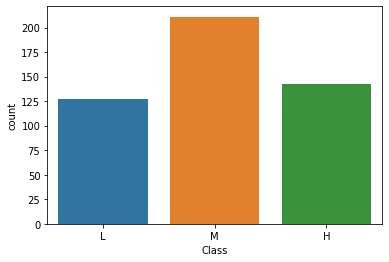

In [9]:
fig = sns.countplot(x="Class",order=['L','M','H'],data=df)
scatter_fig = fig.get_figure()
scatter_fig.savefig(path + '/' + "学生成绩分布图.png")

由学生成绩的柱状图可以看出，基本上符合正态分布，所以不需要进行标准化处理

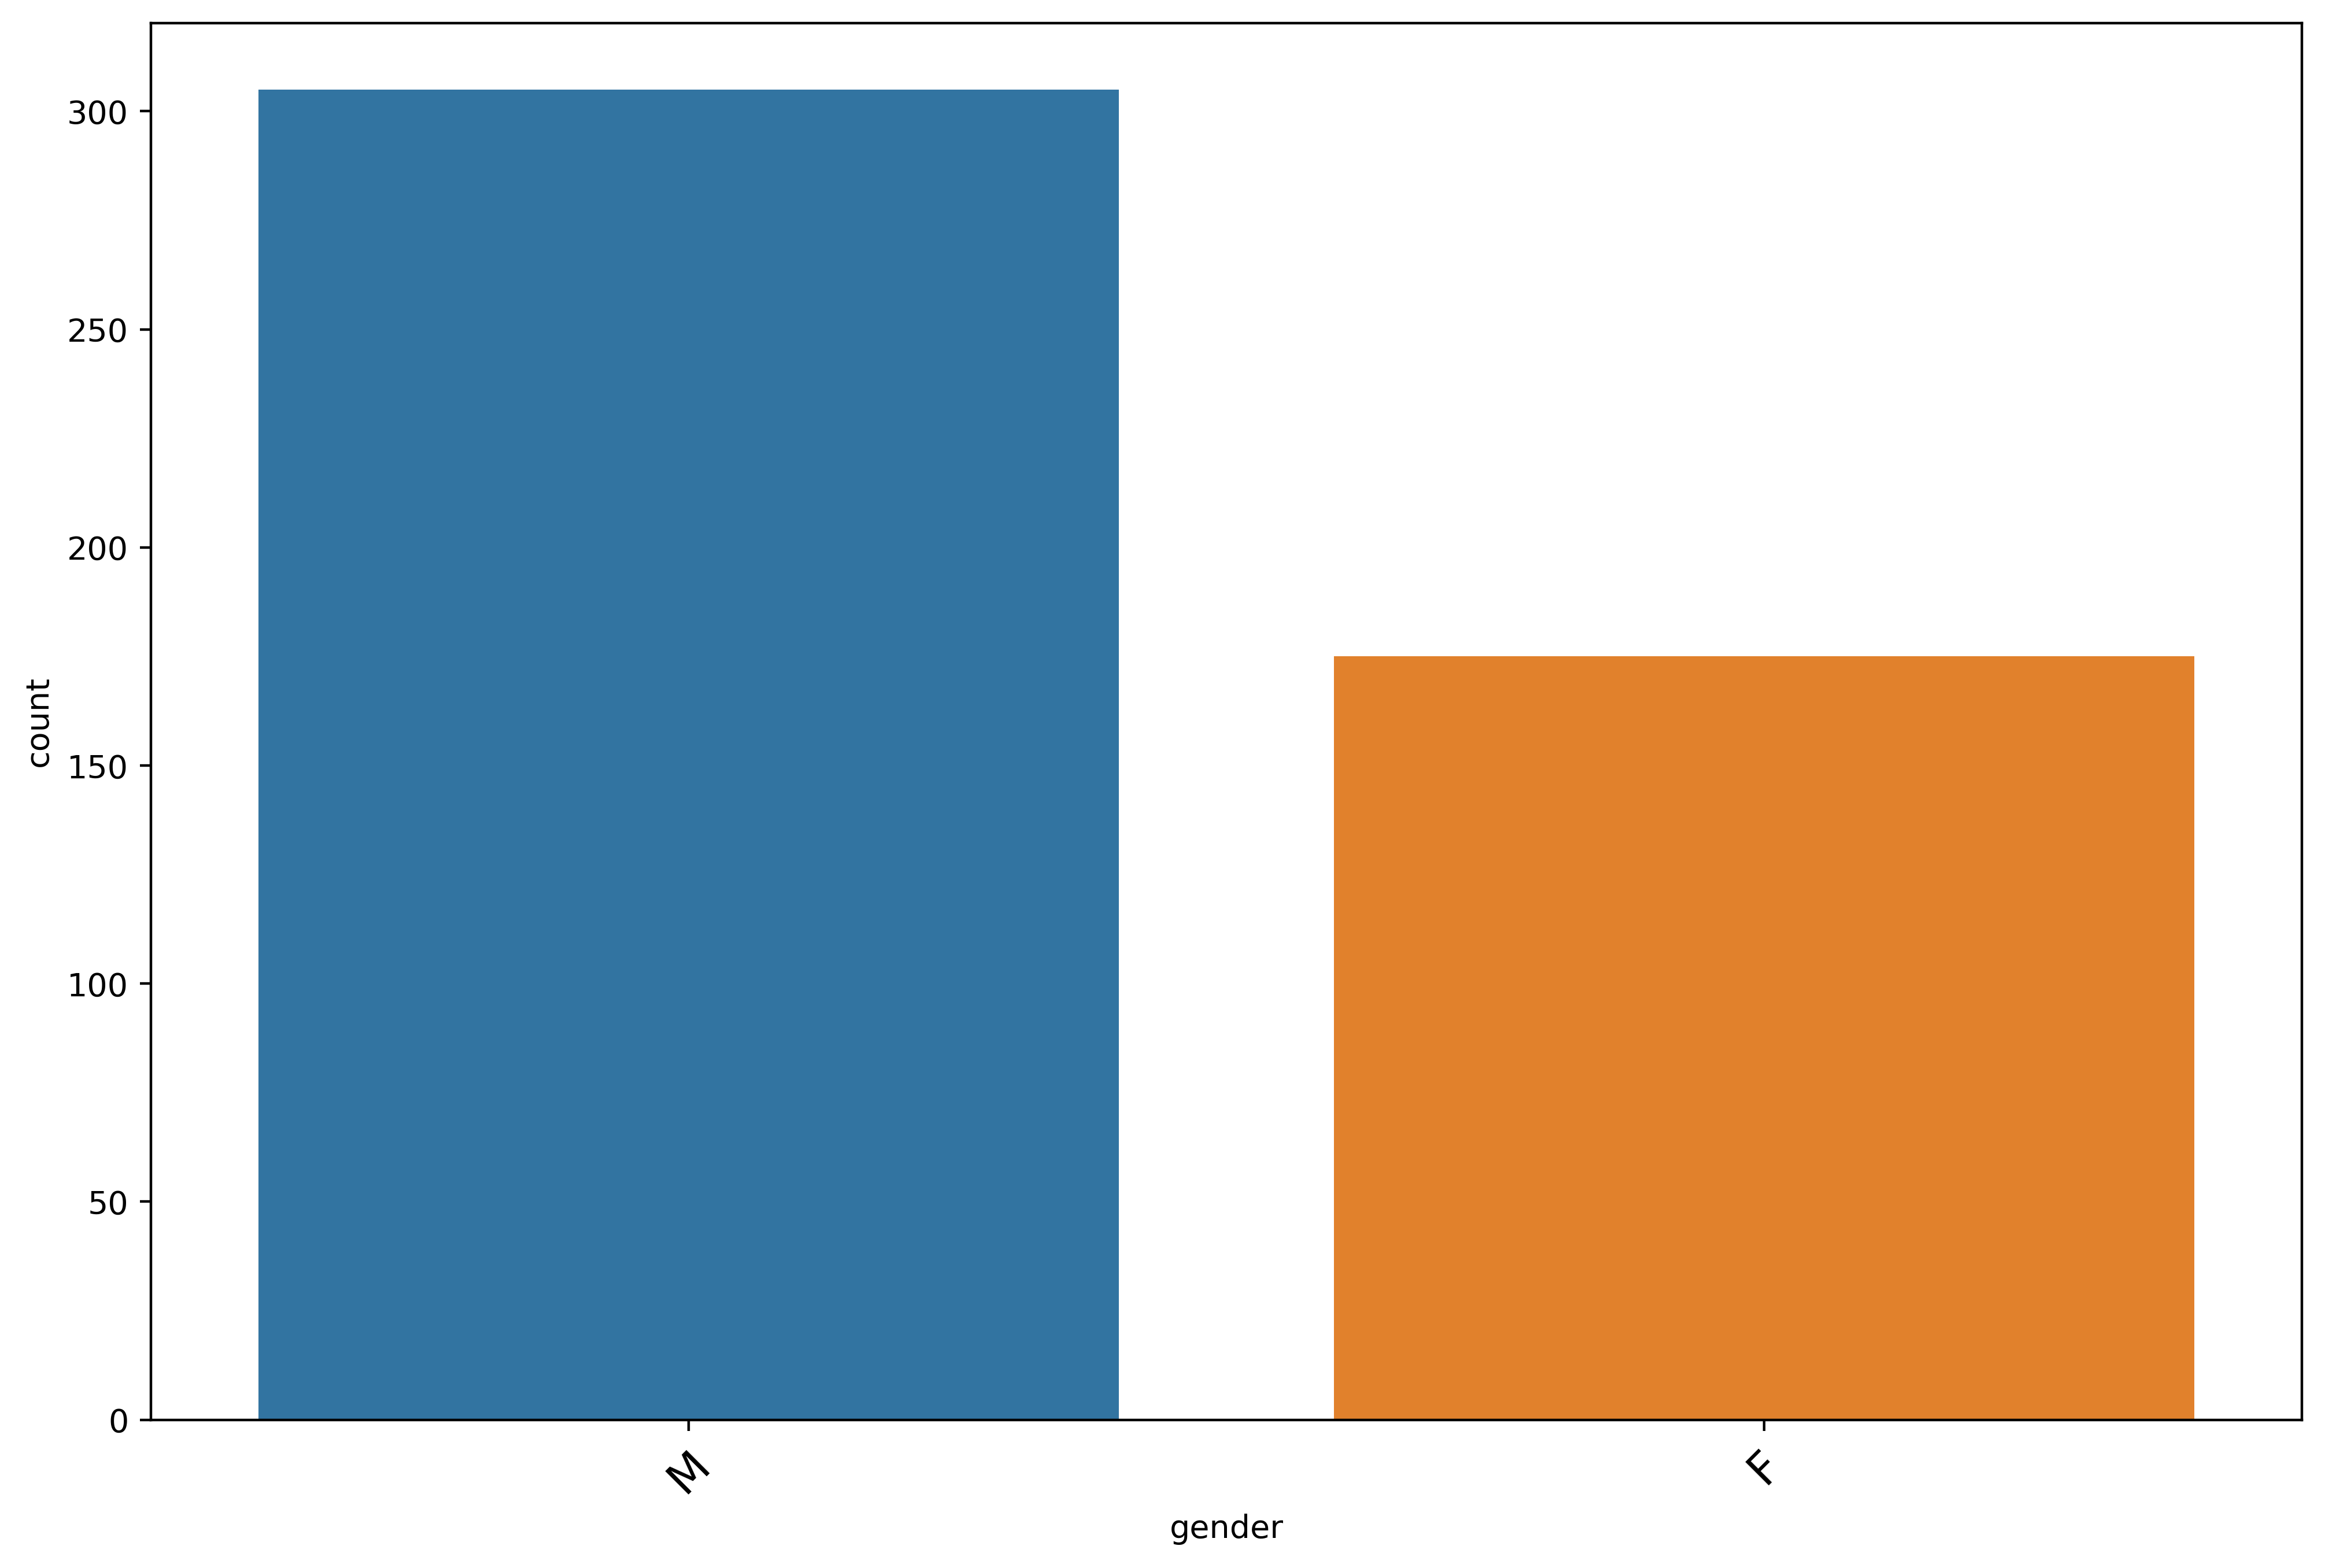

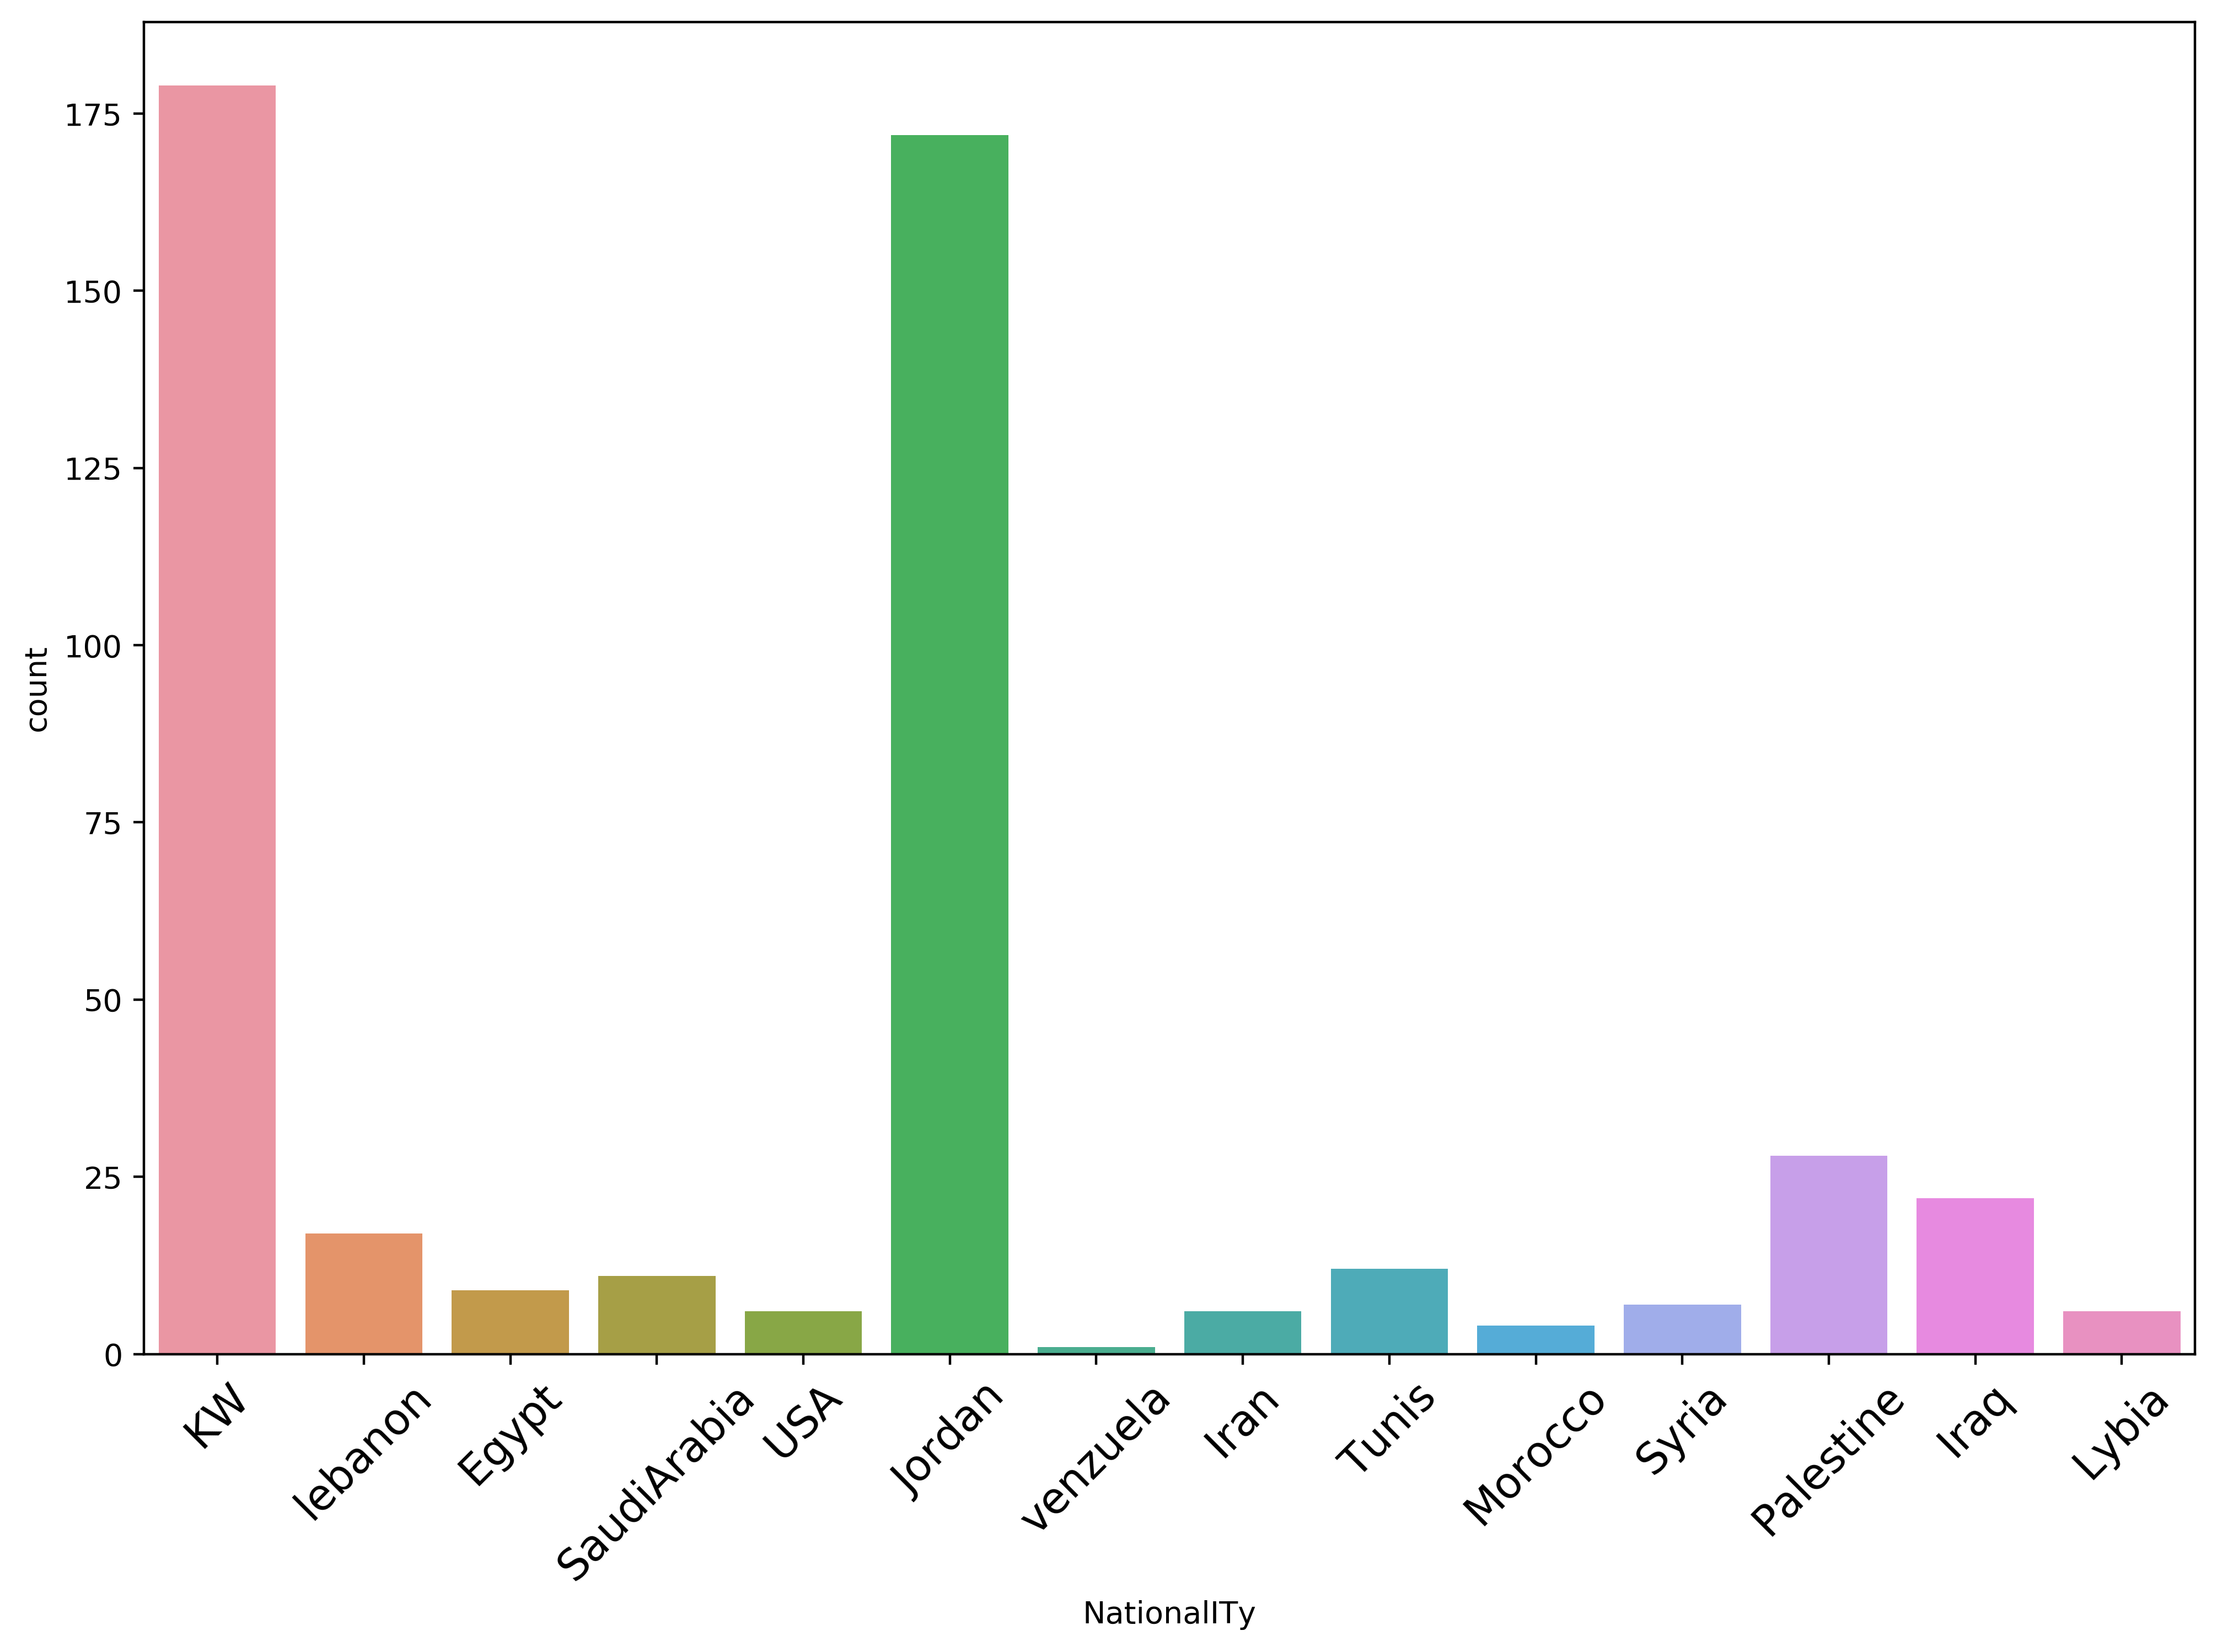

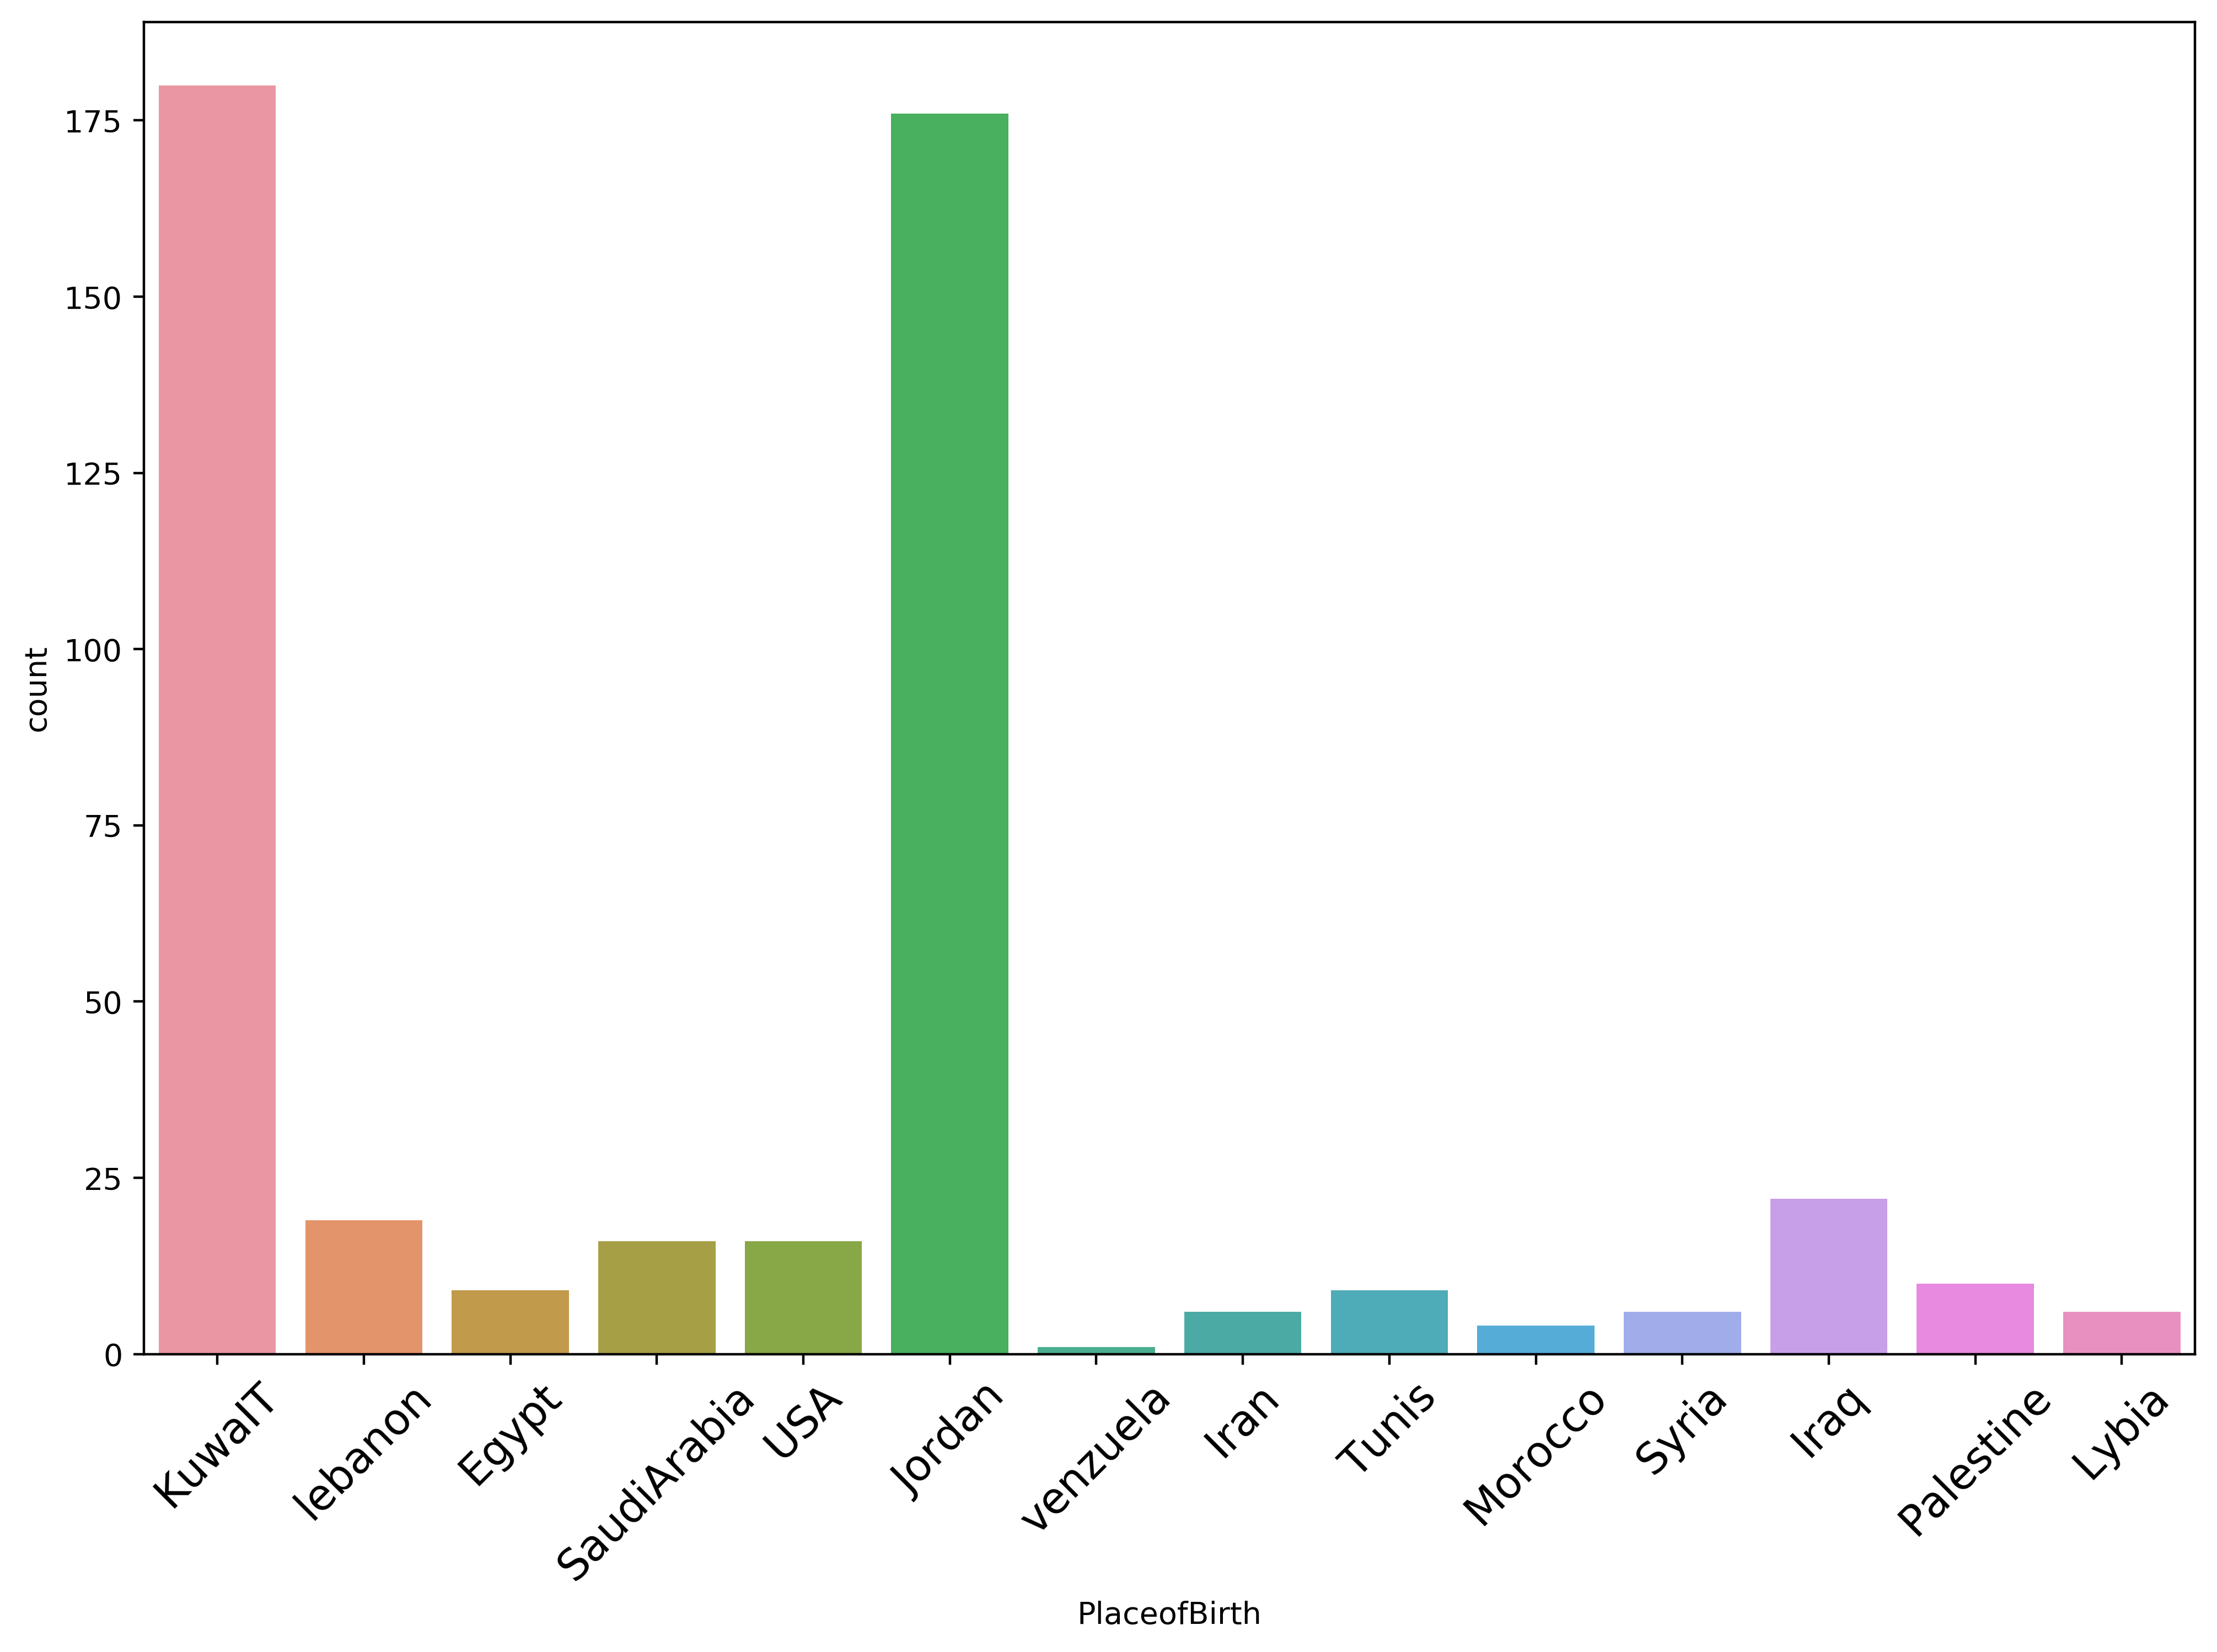

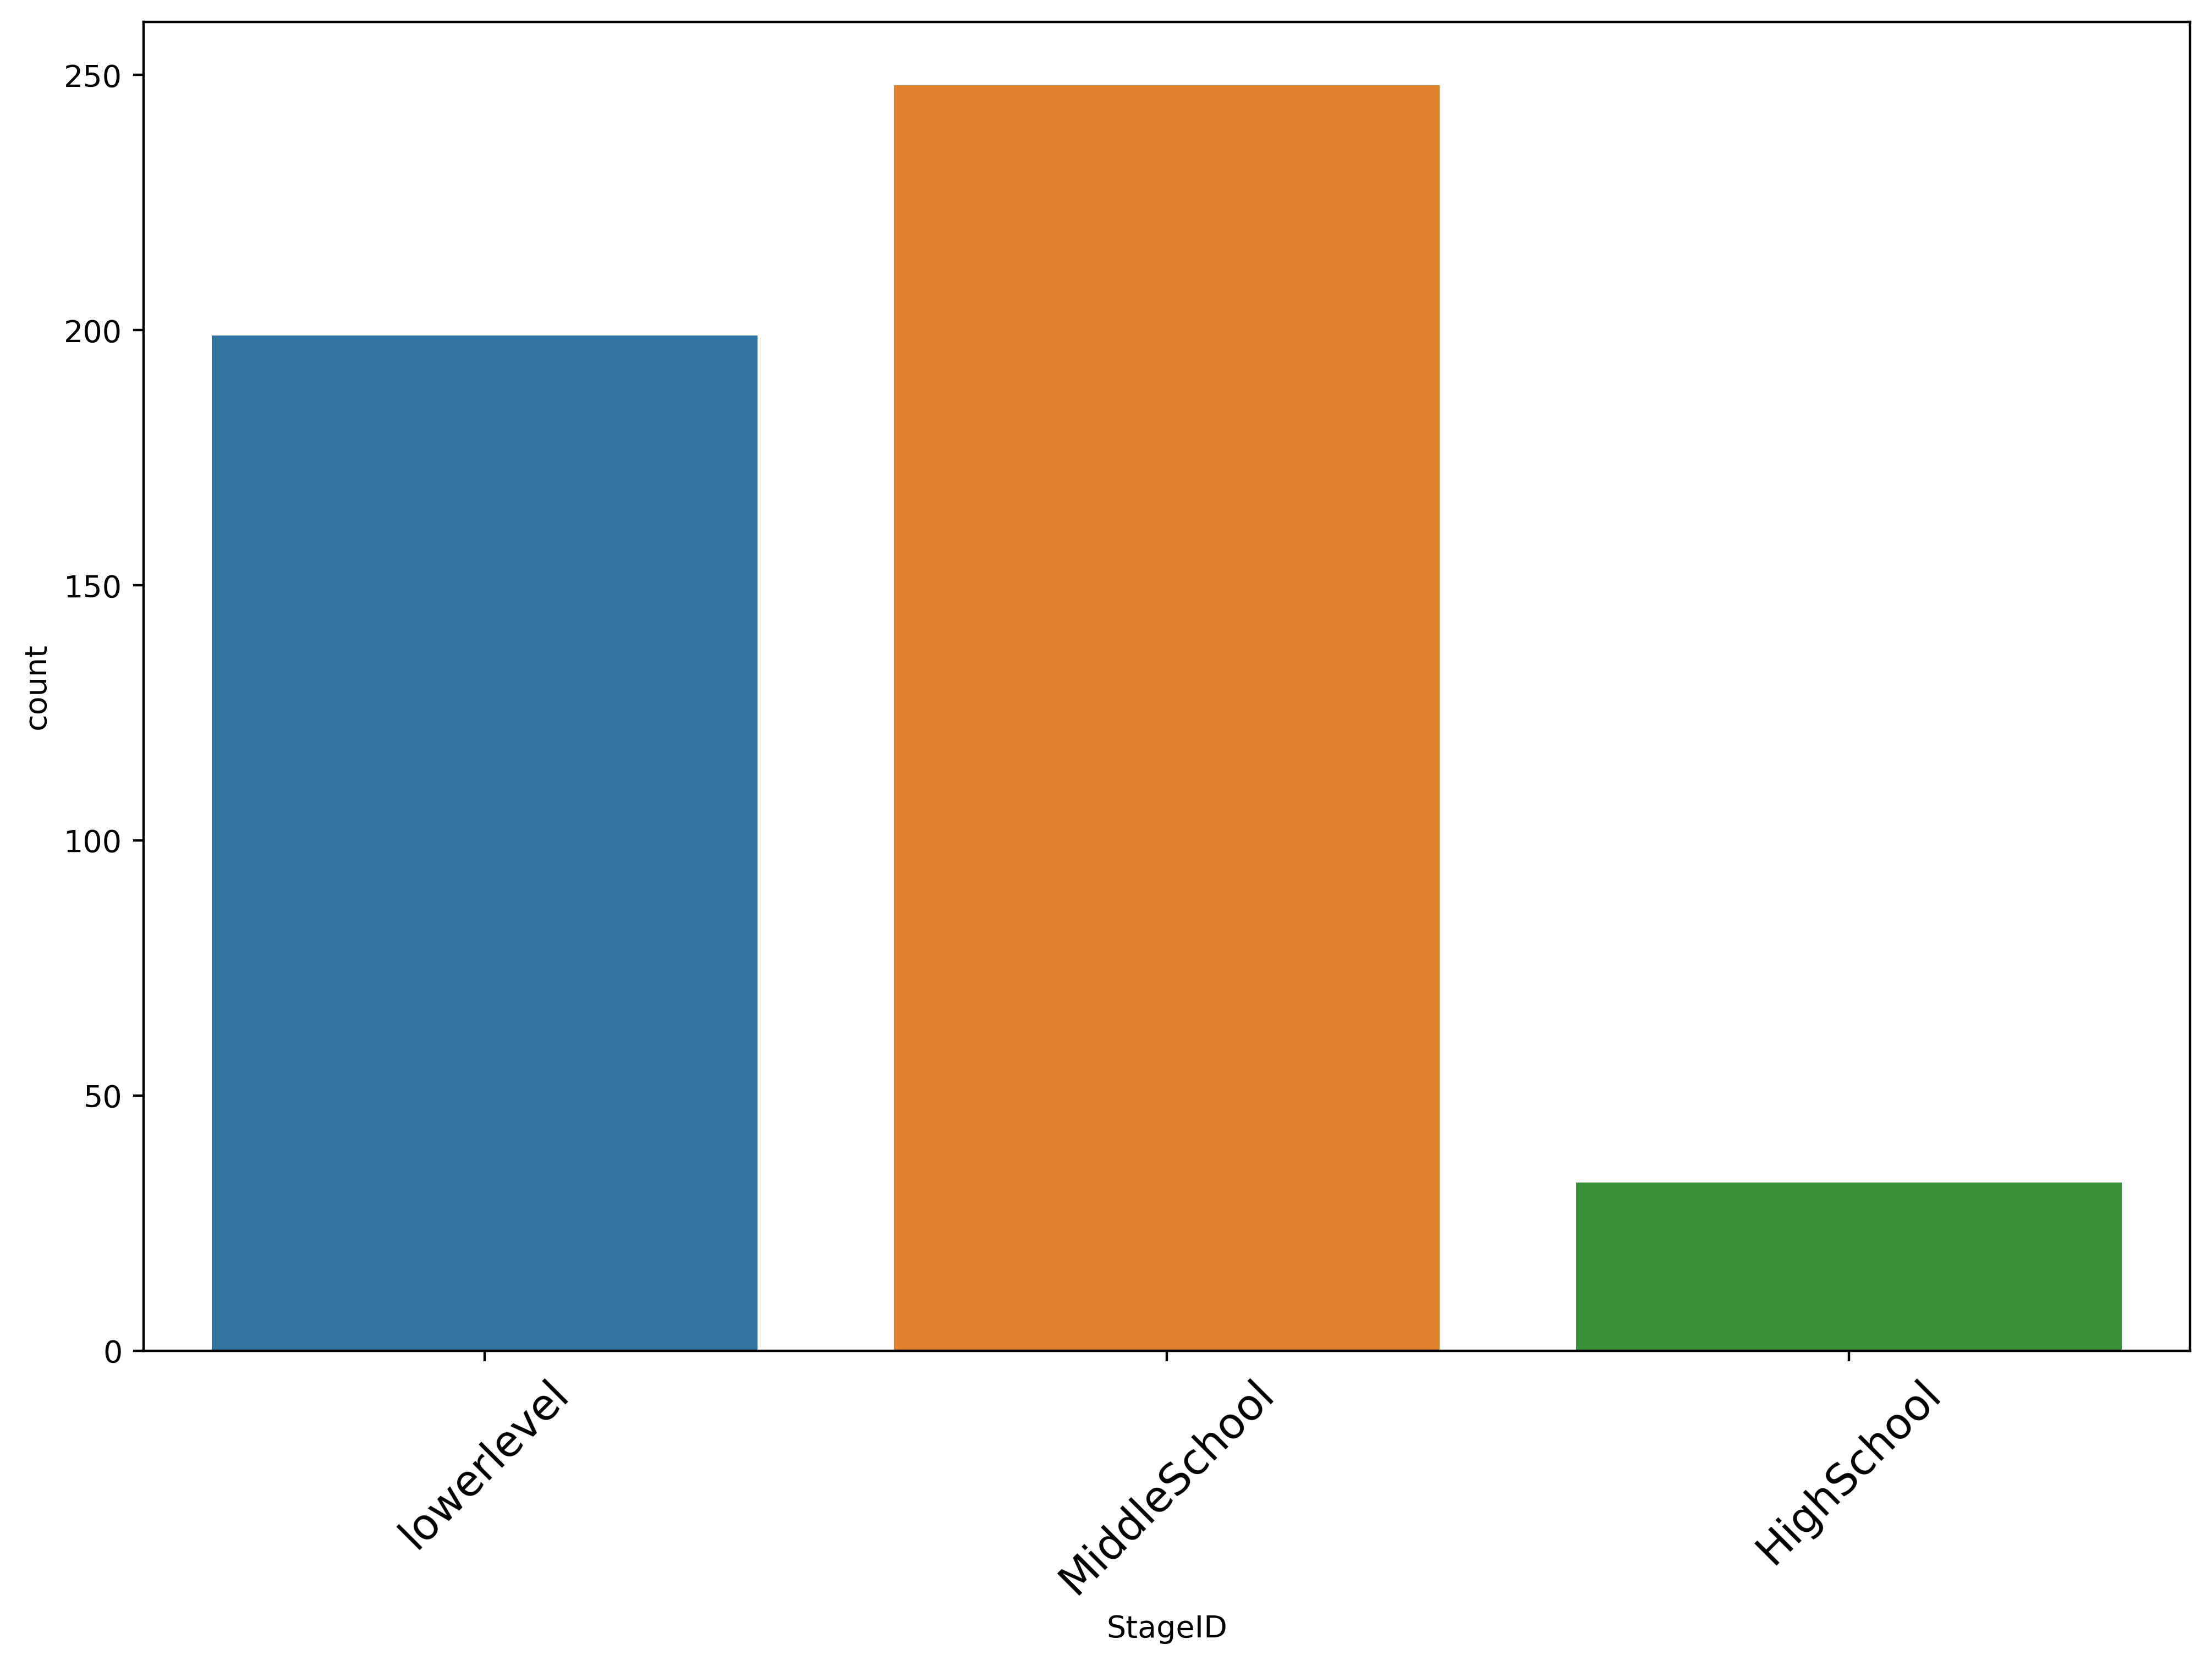

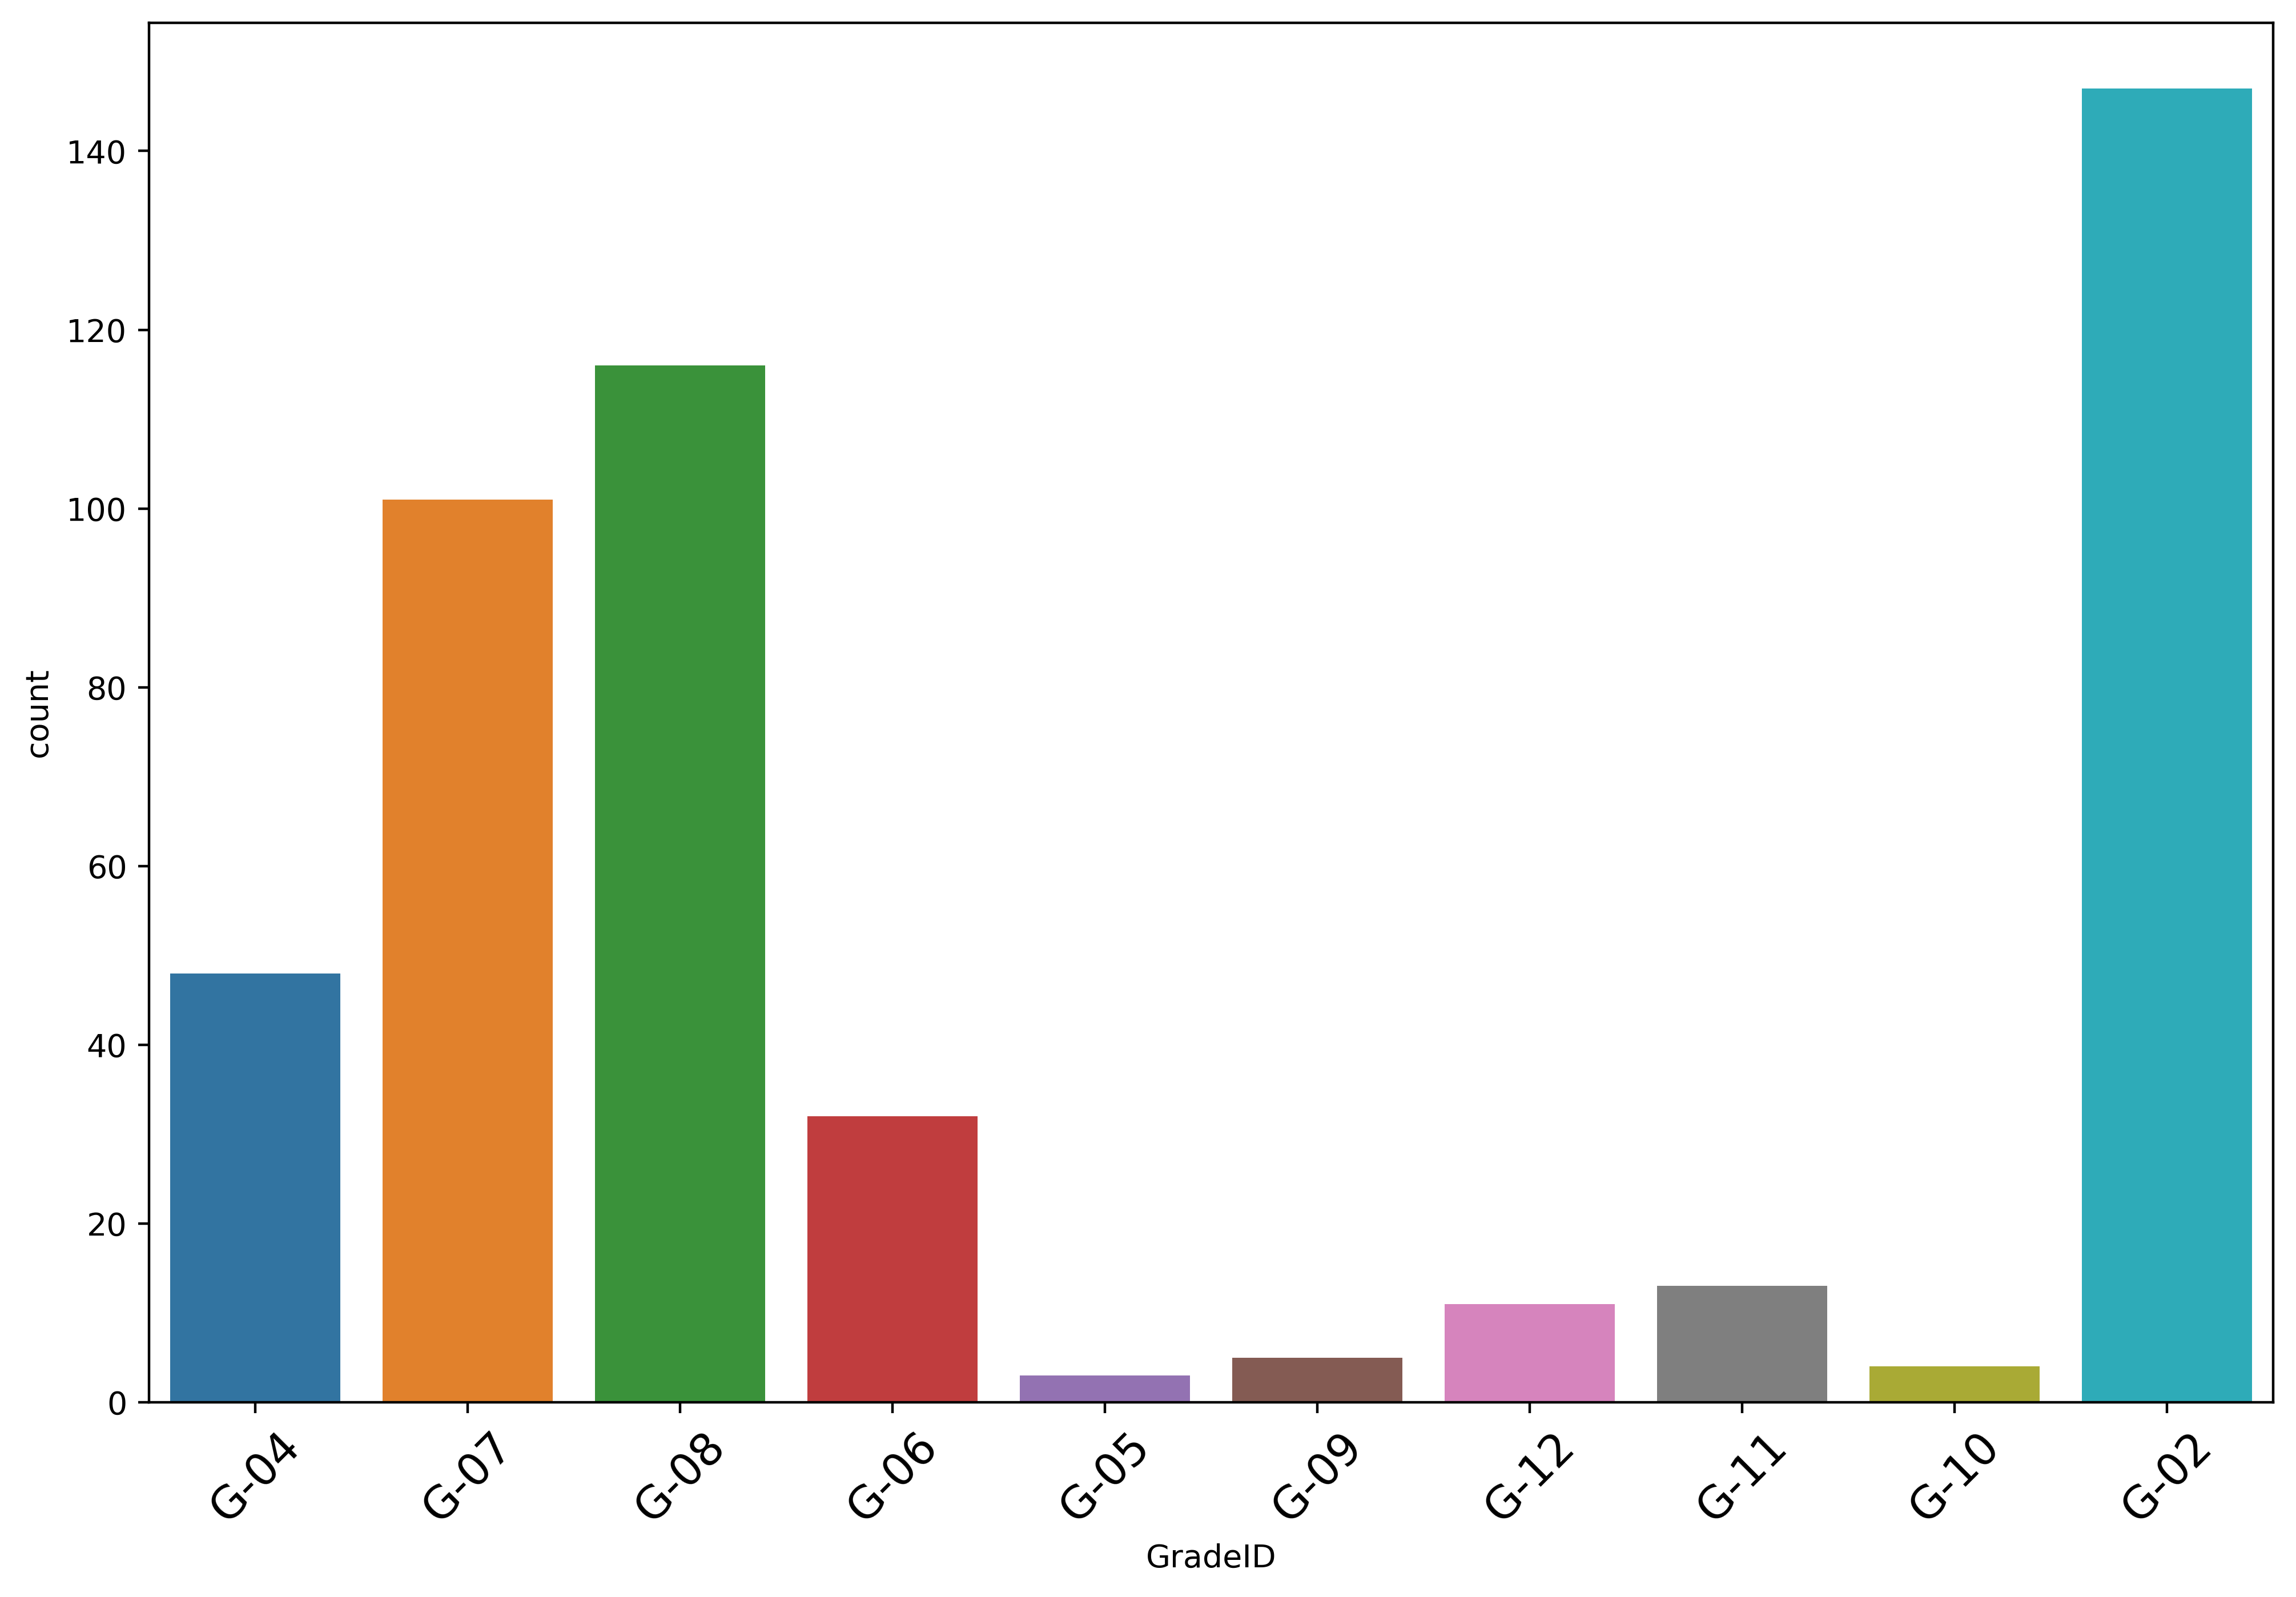

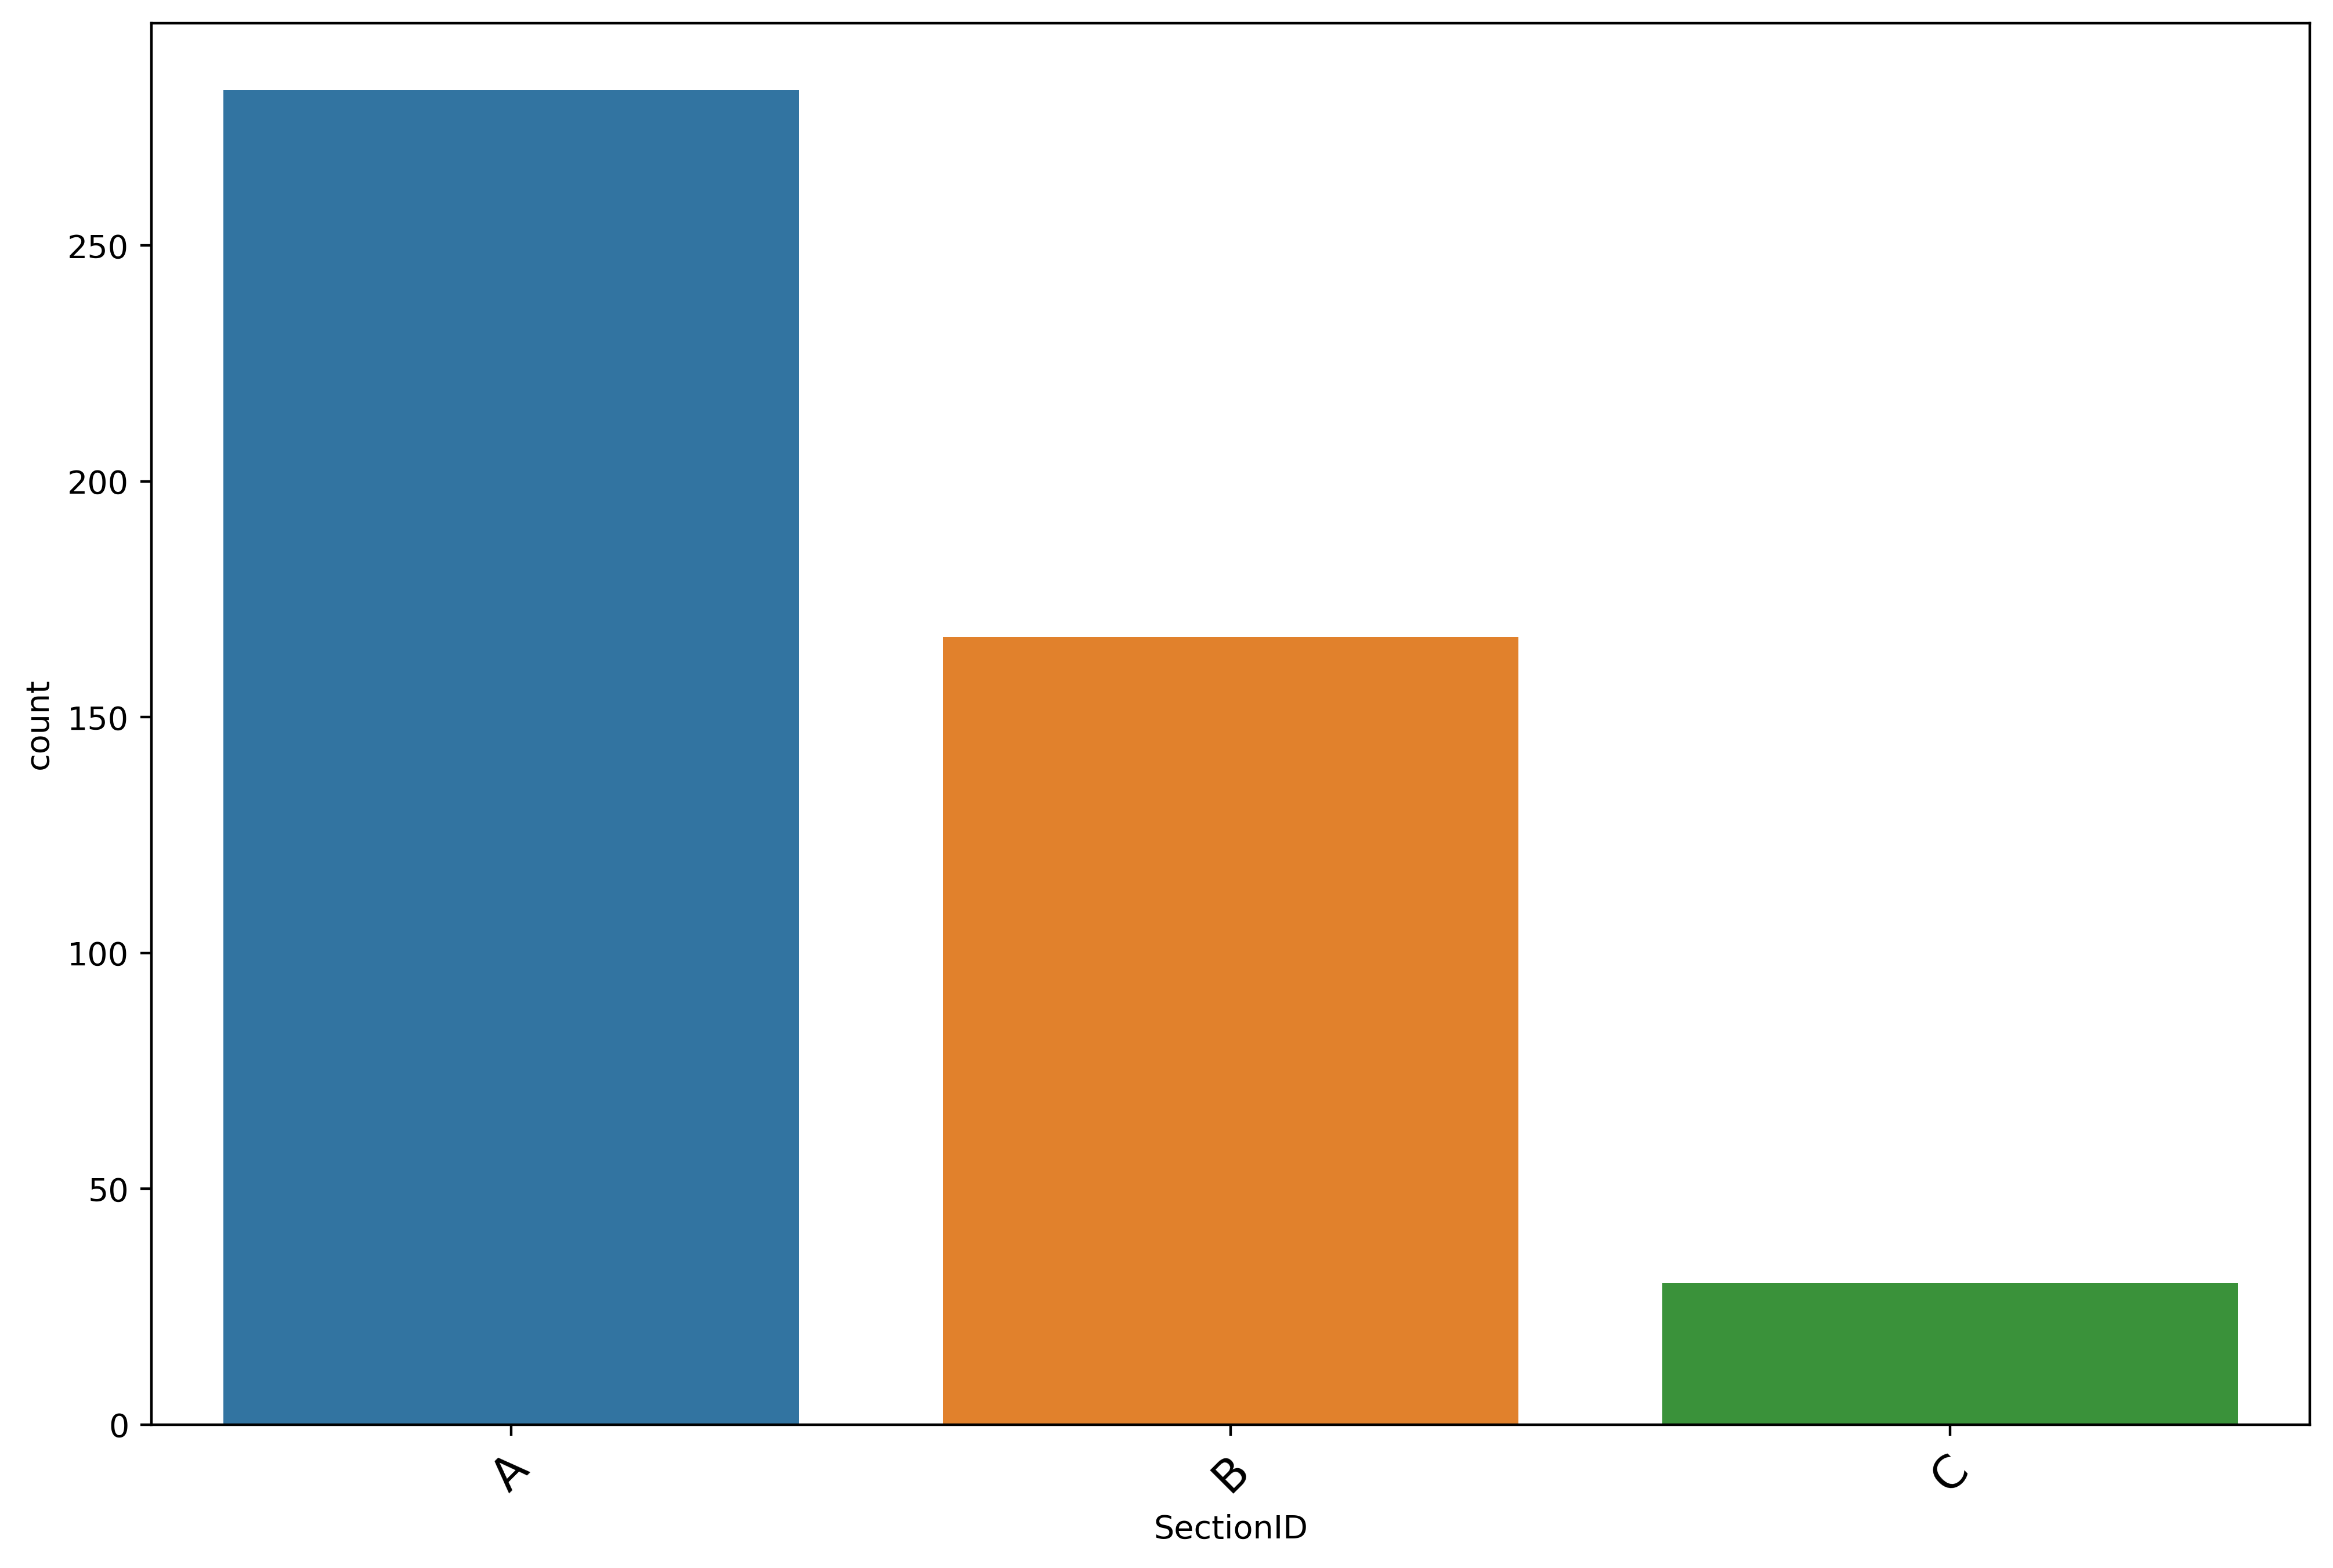

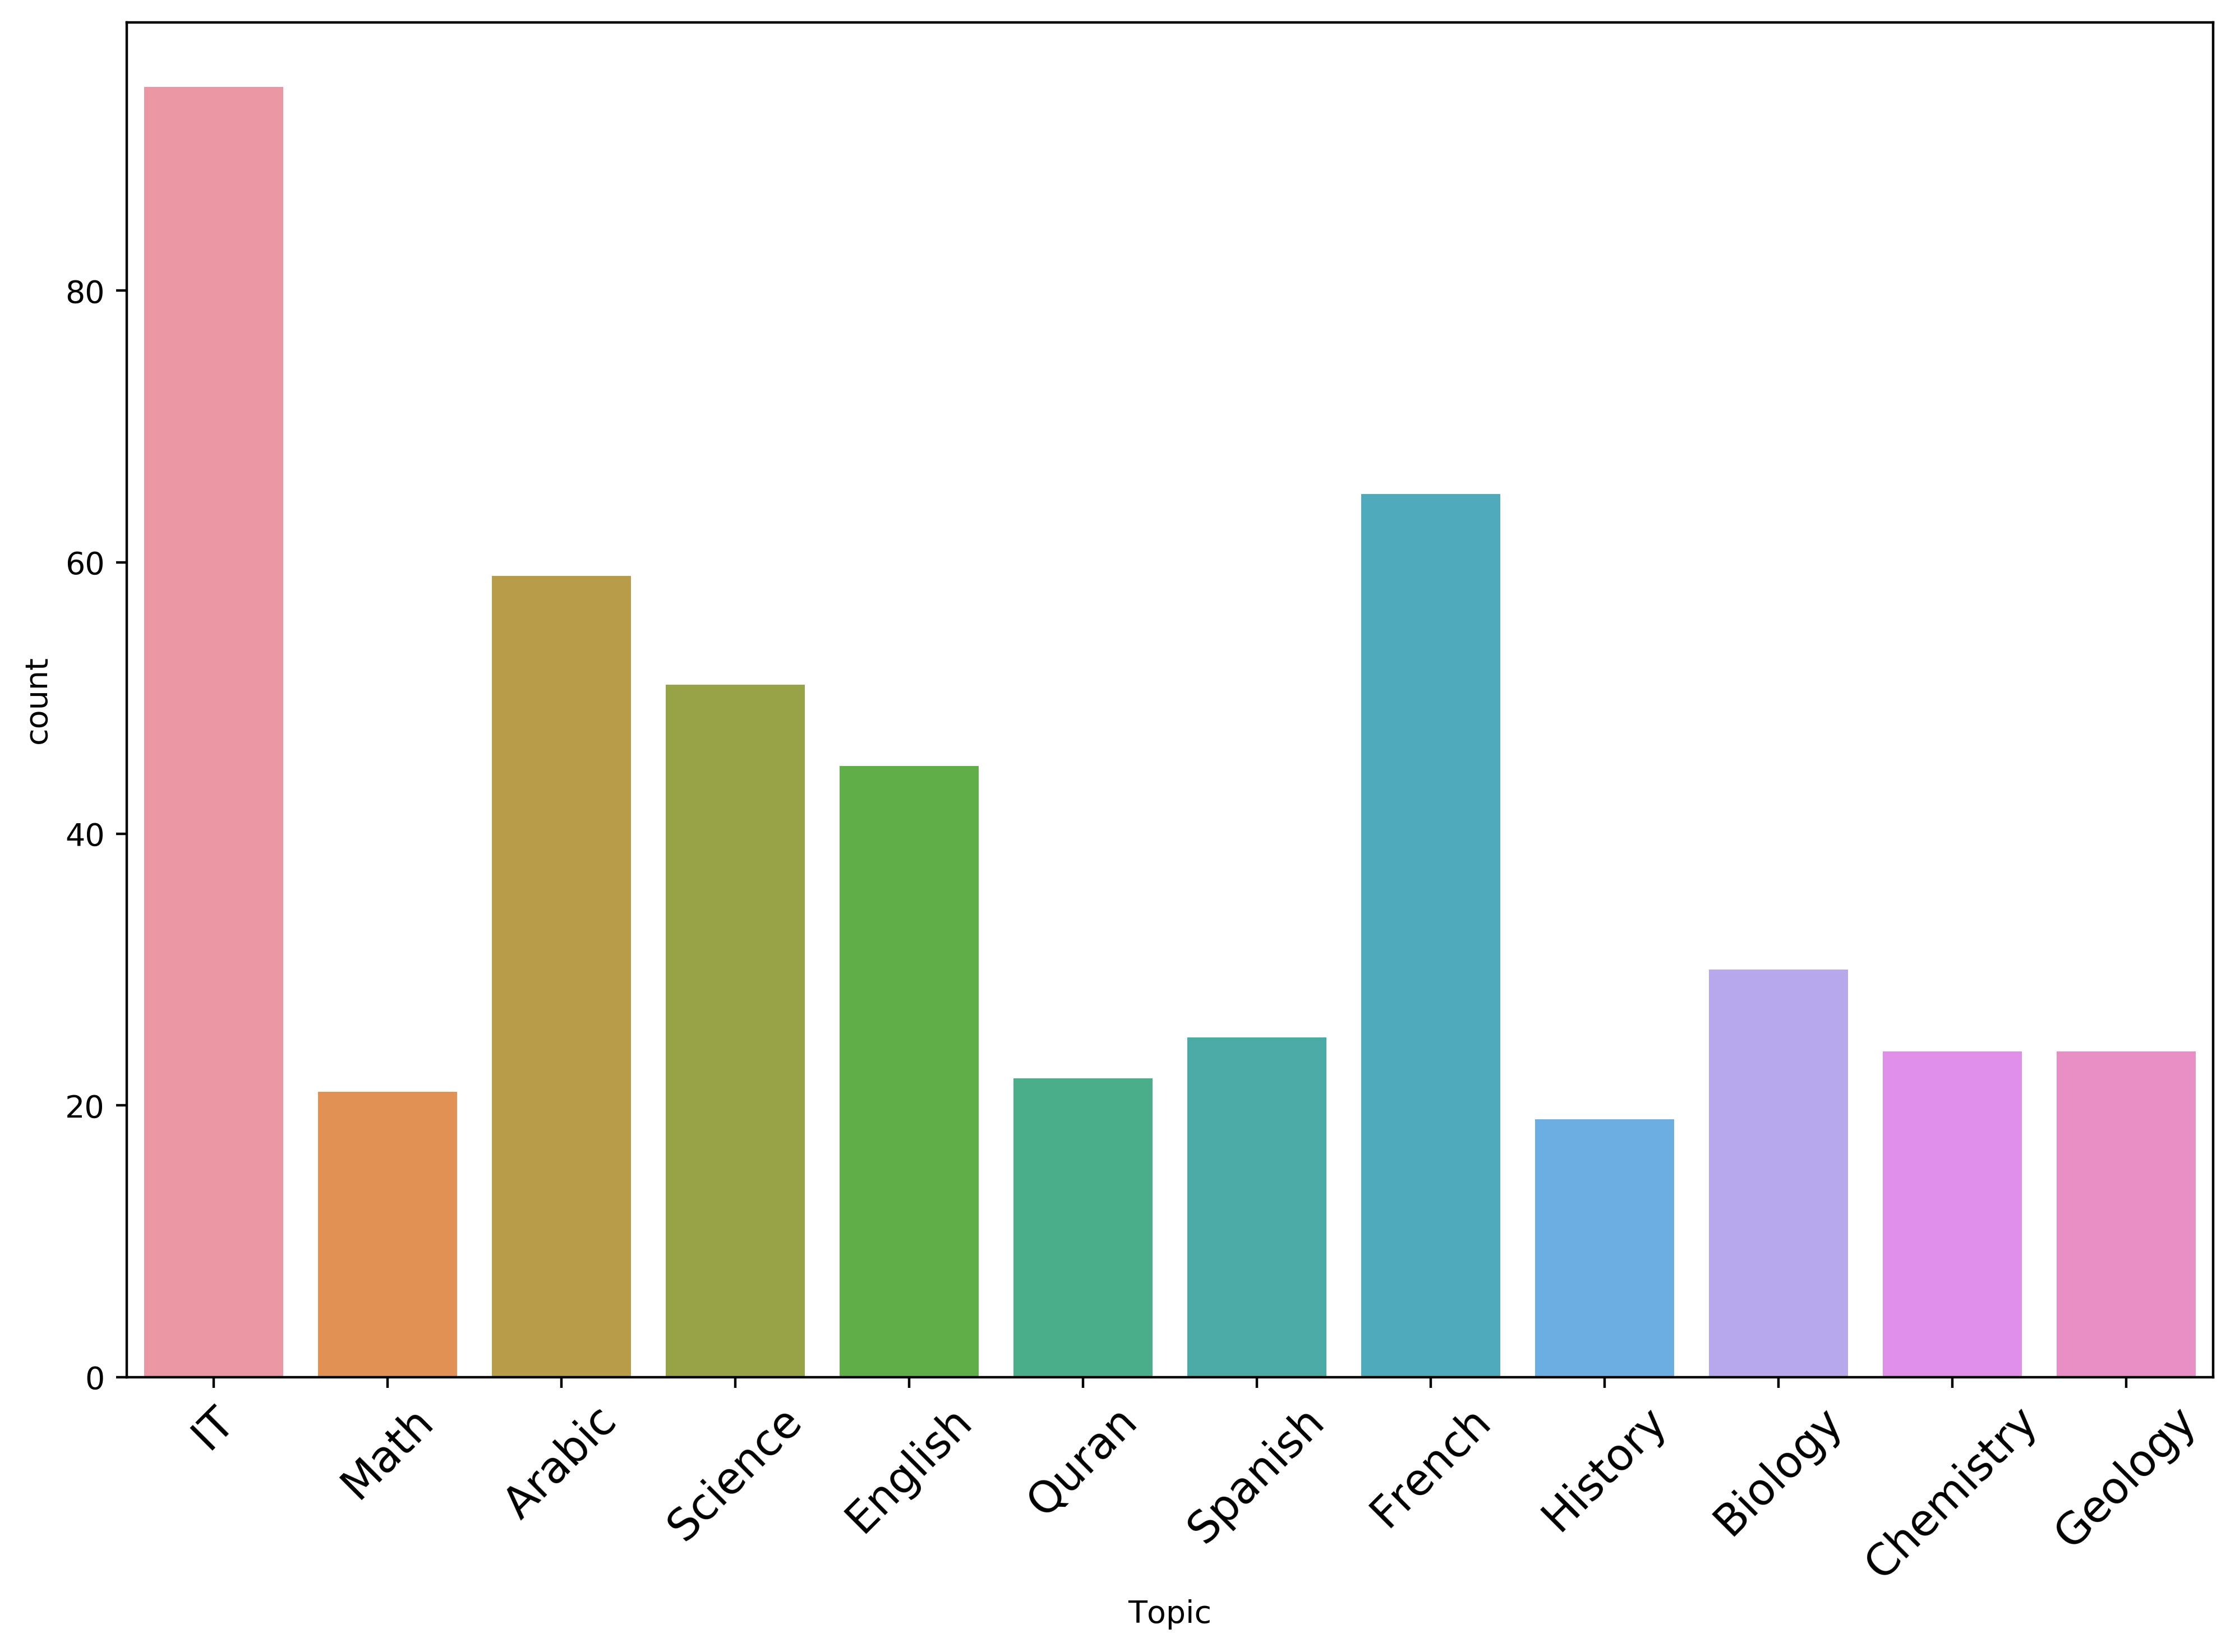

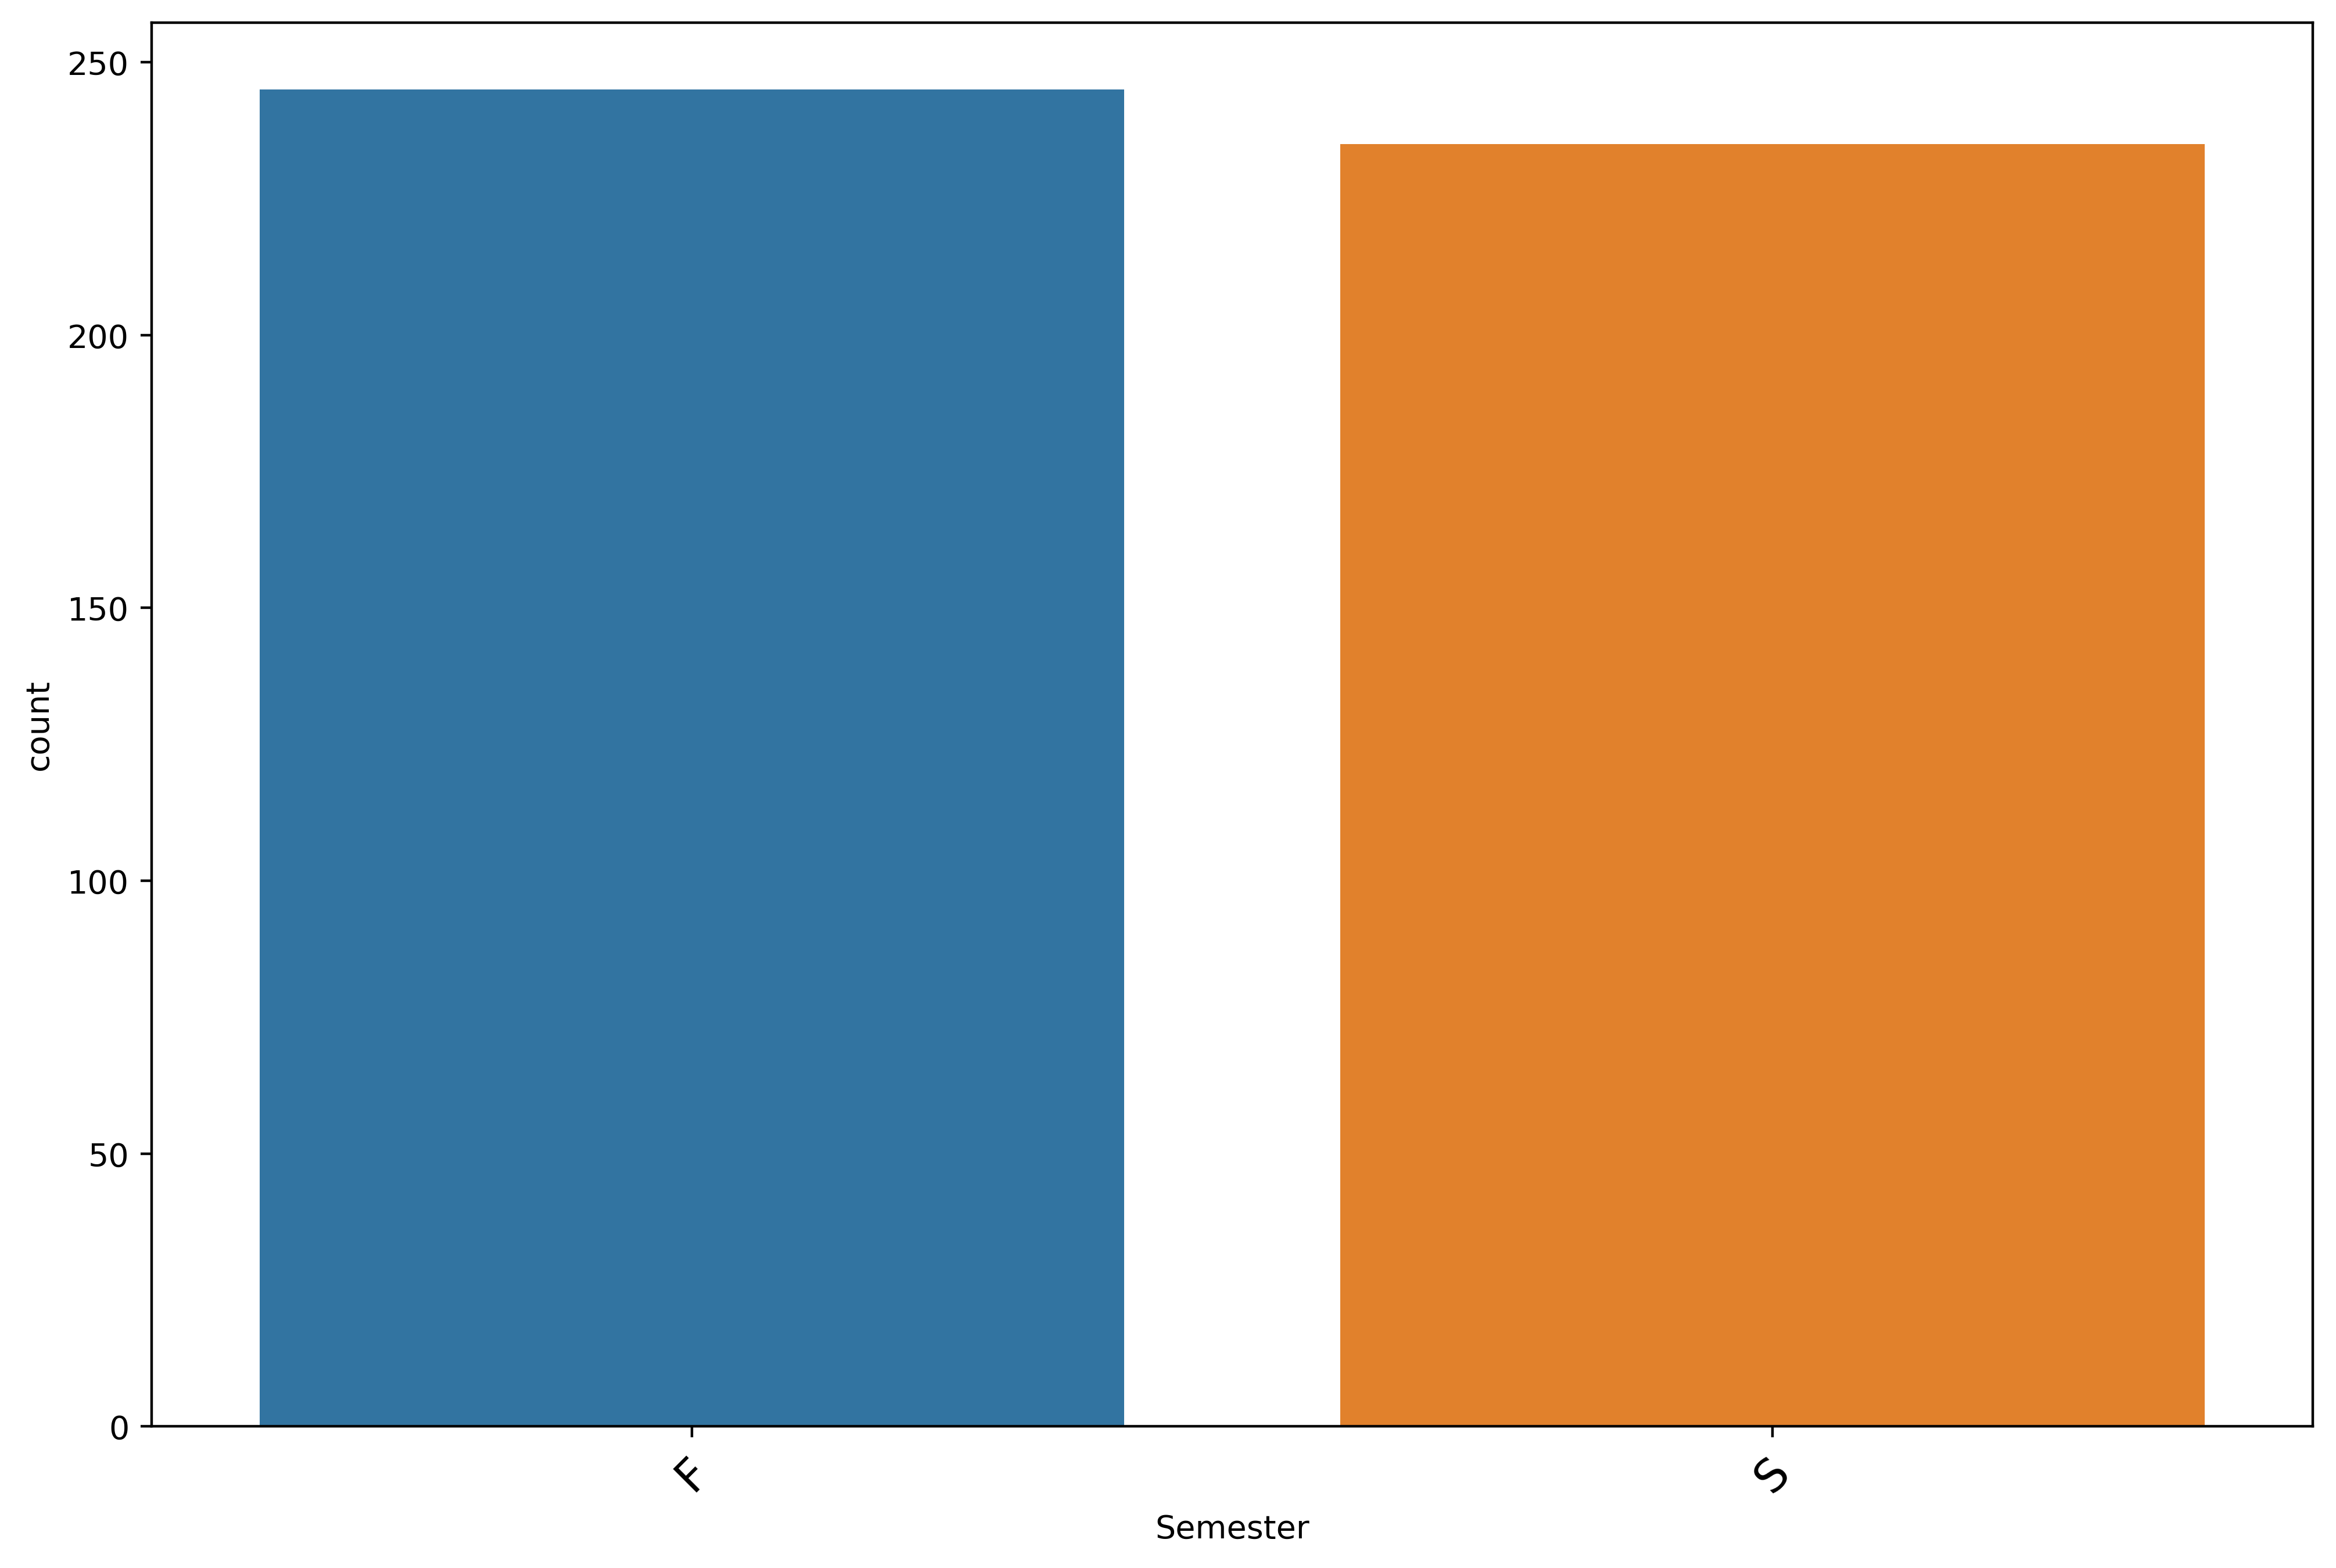

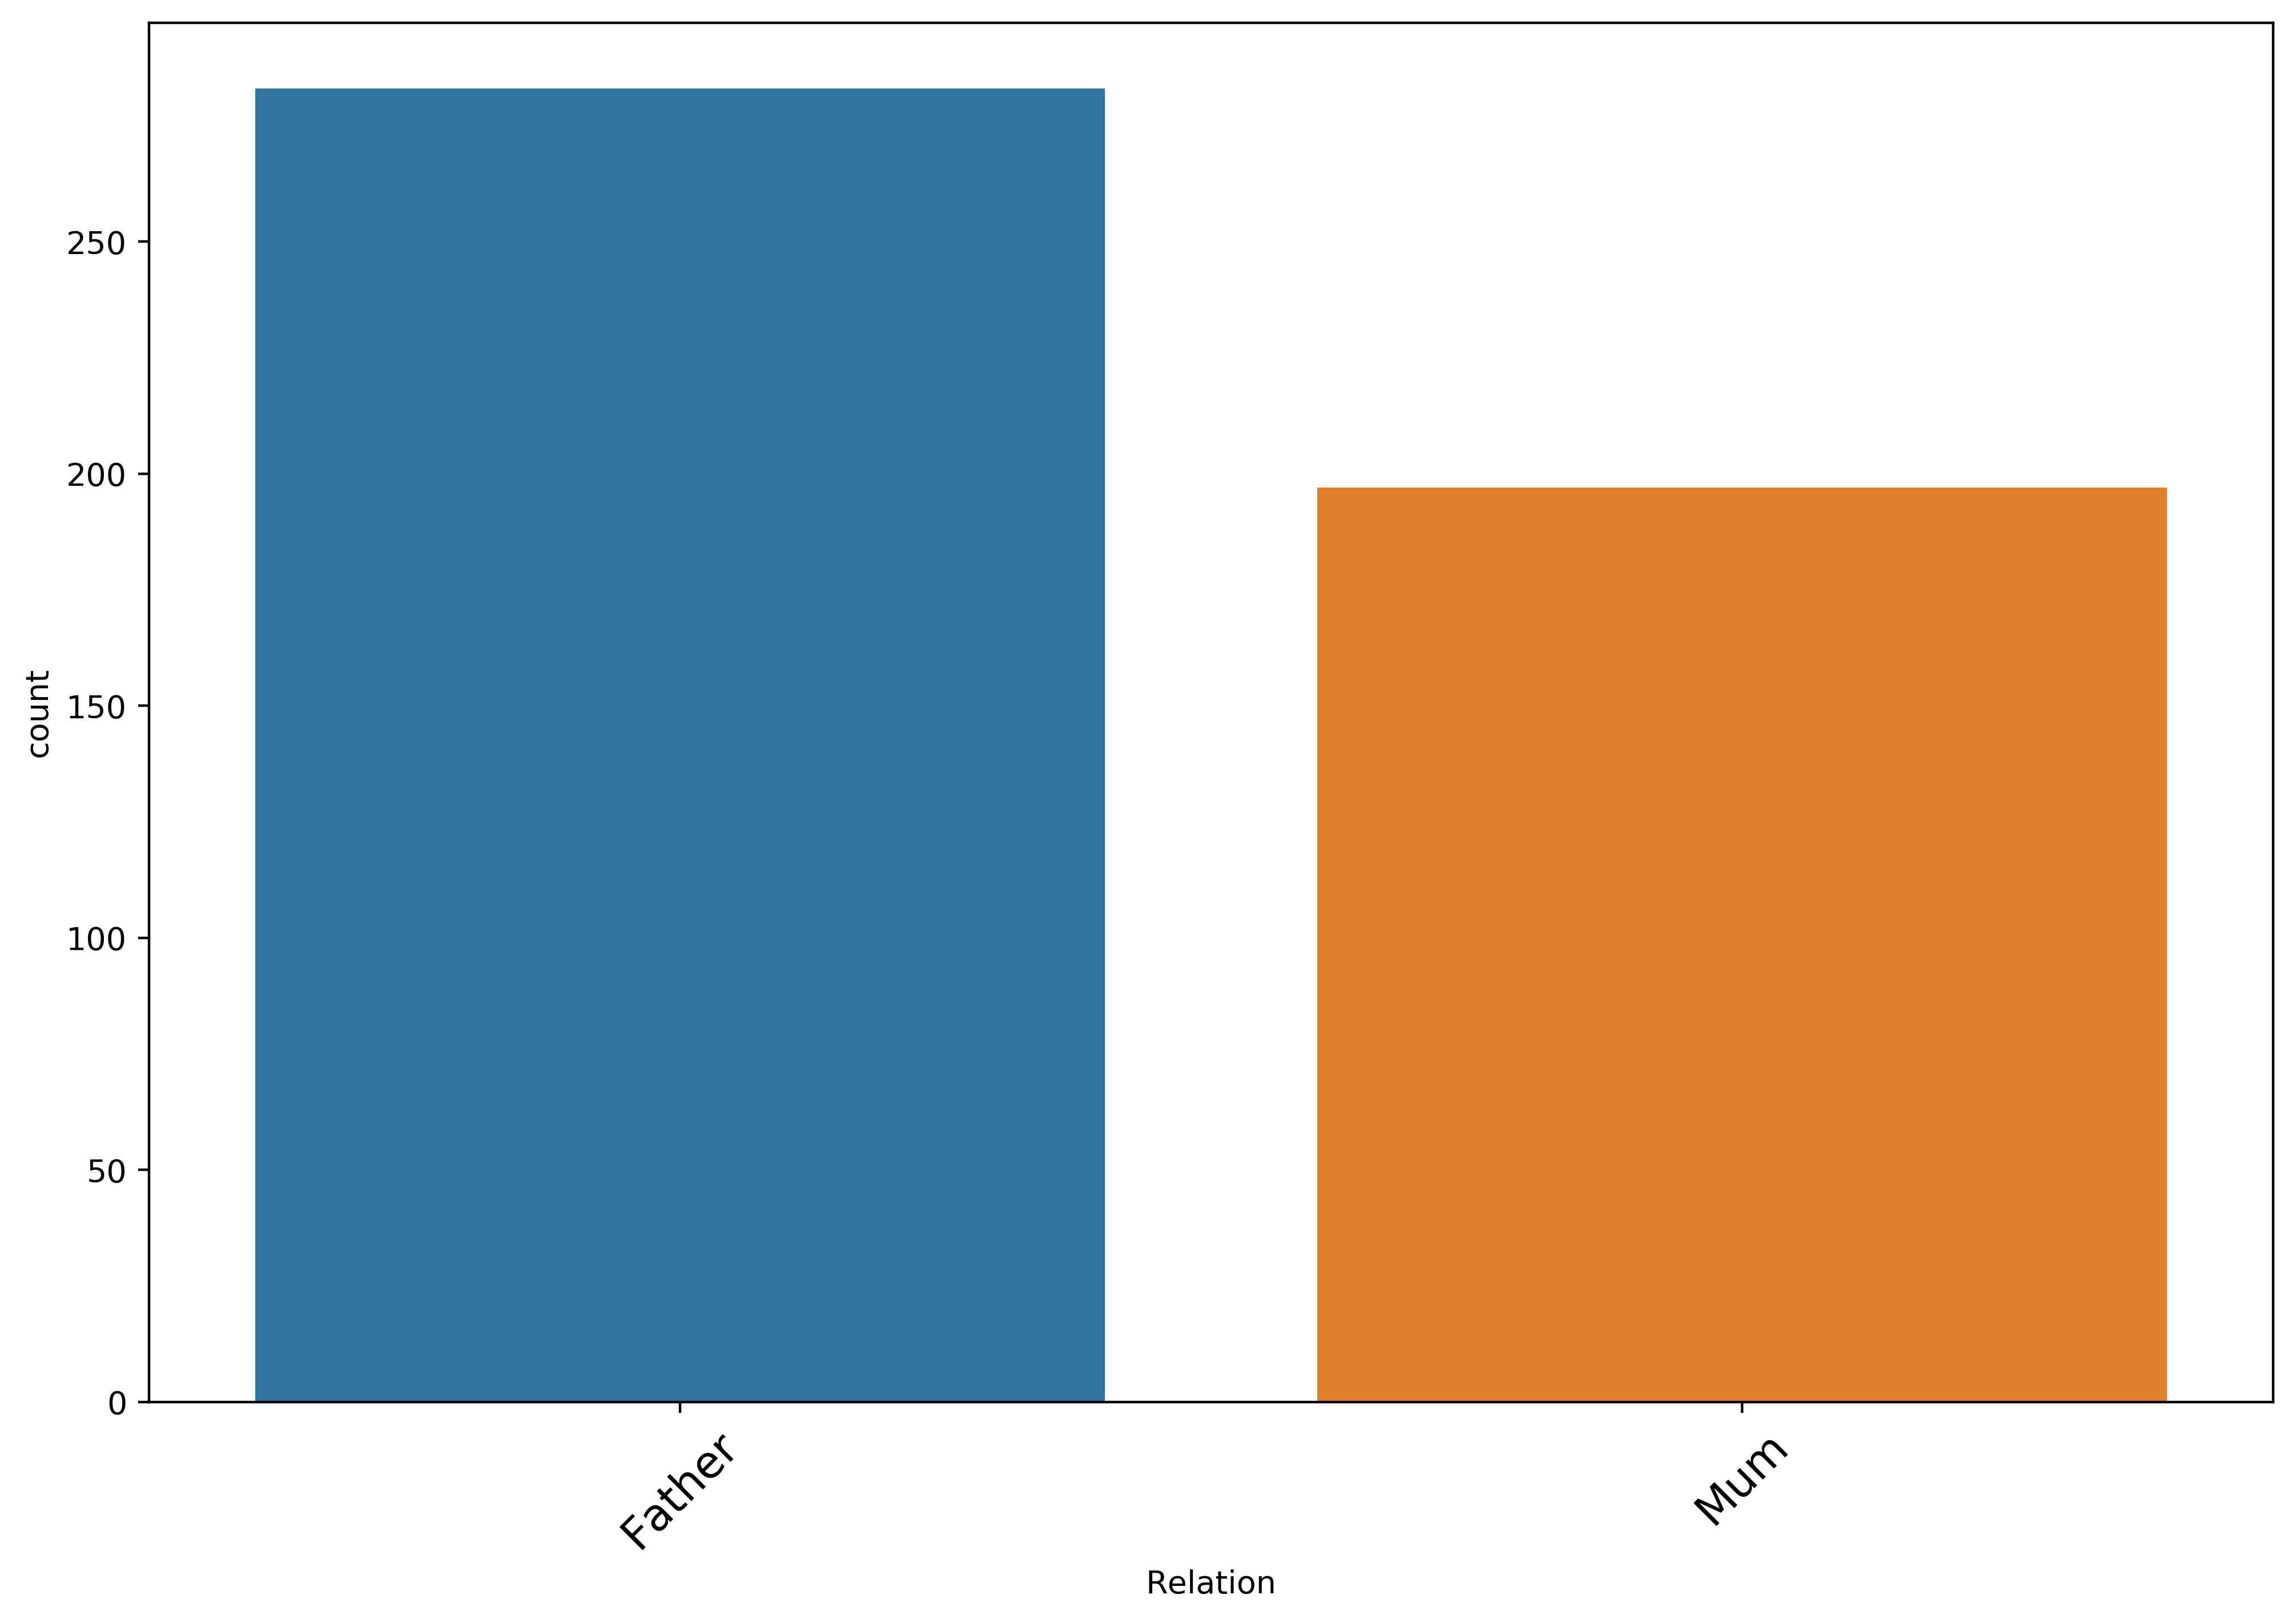

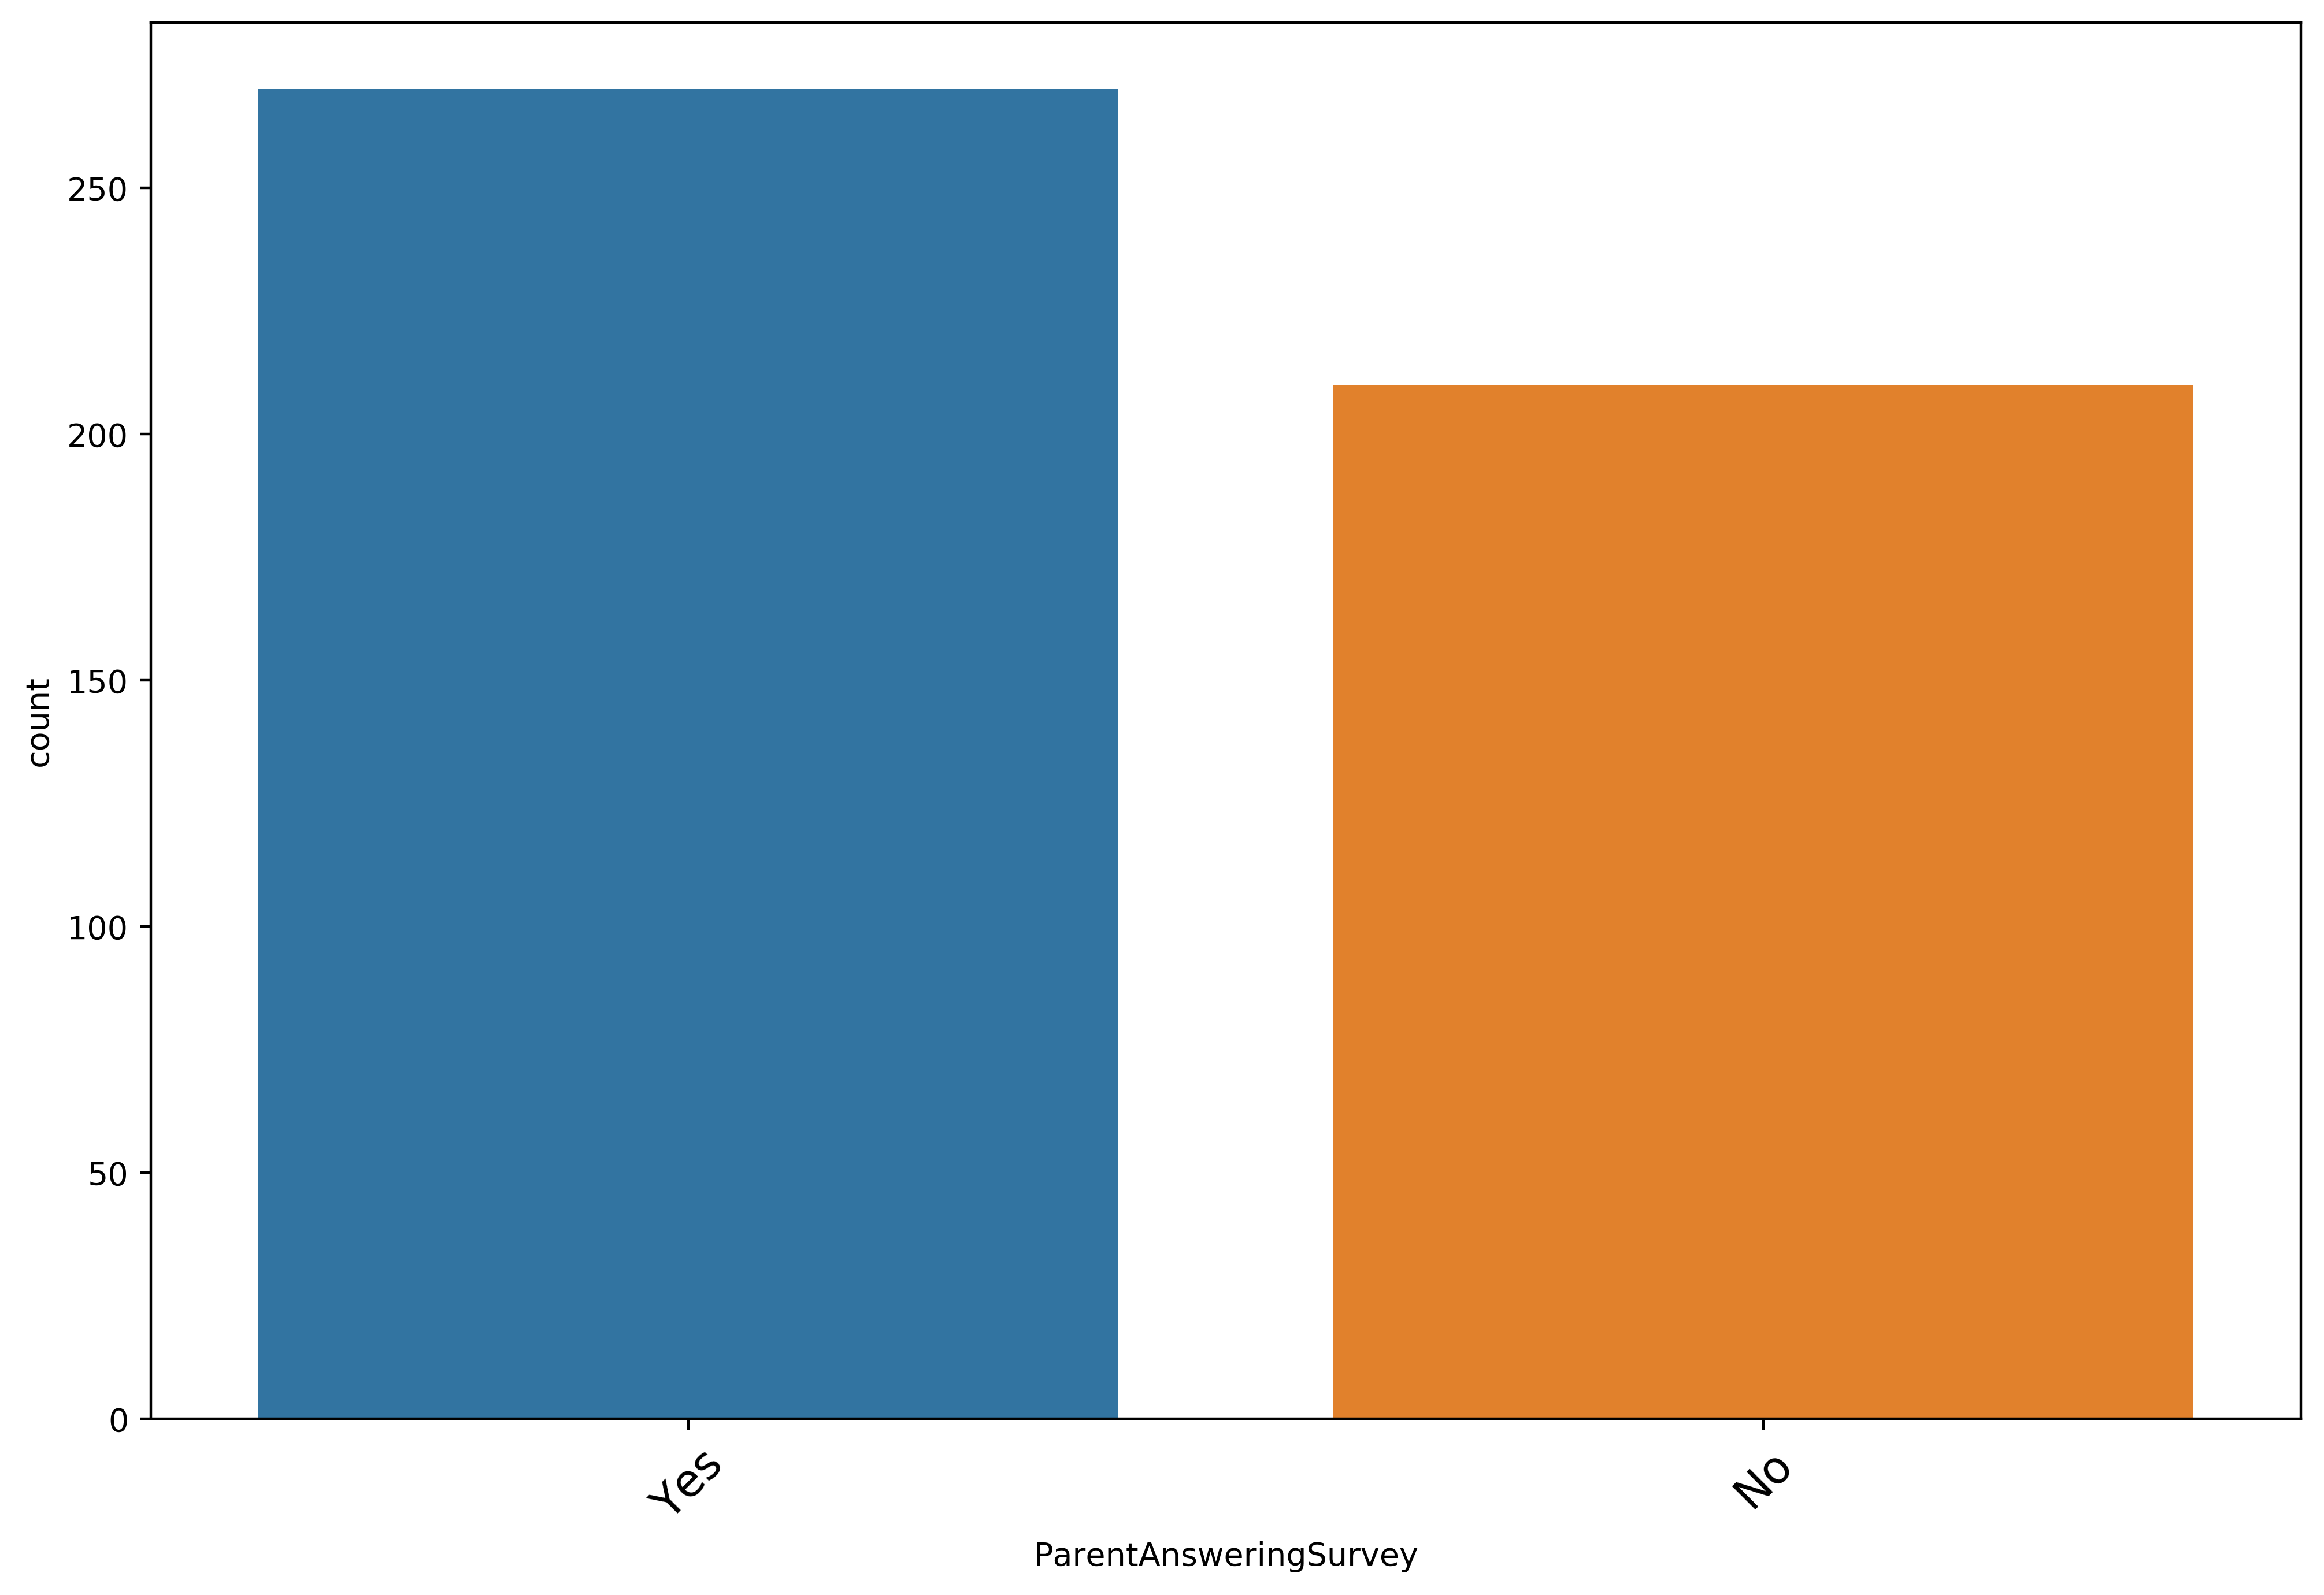

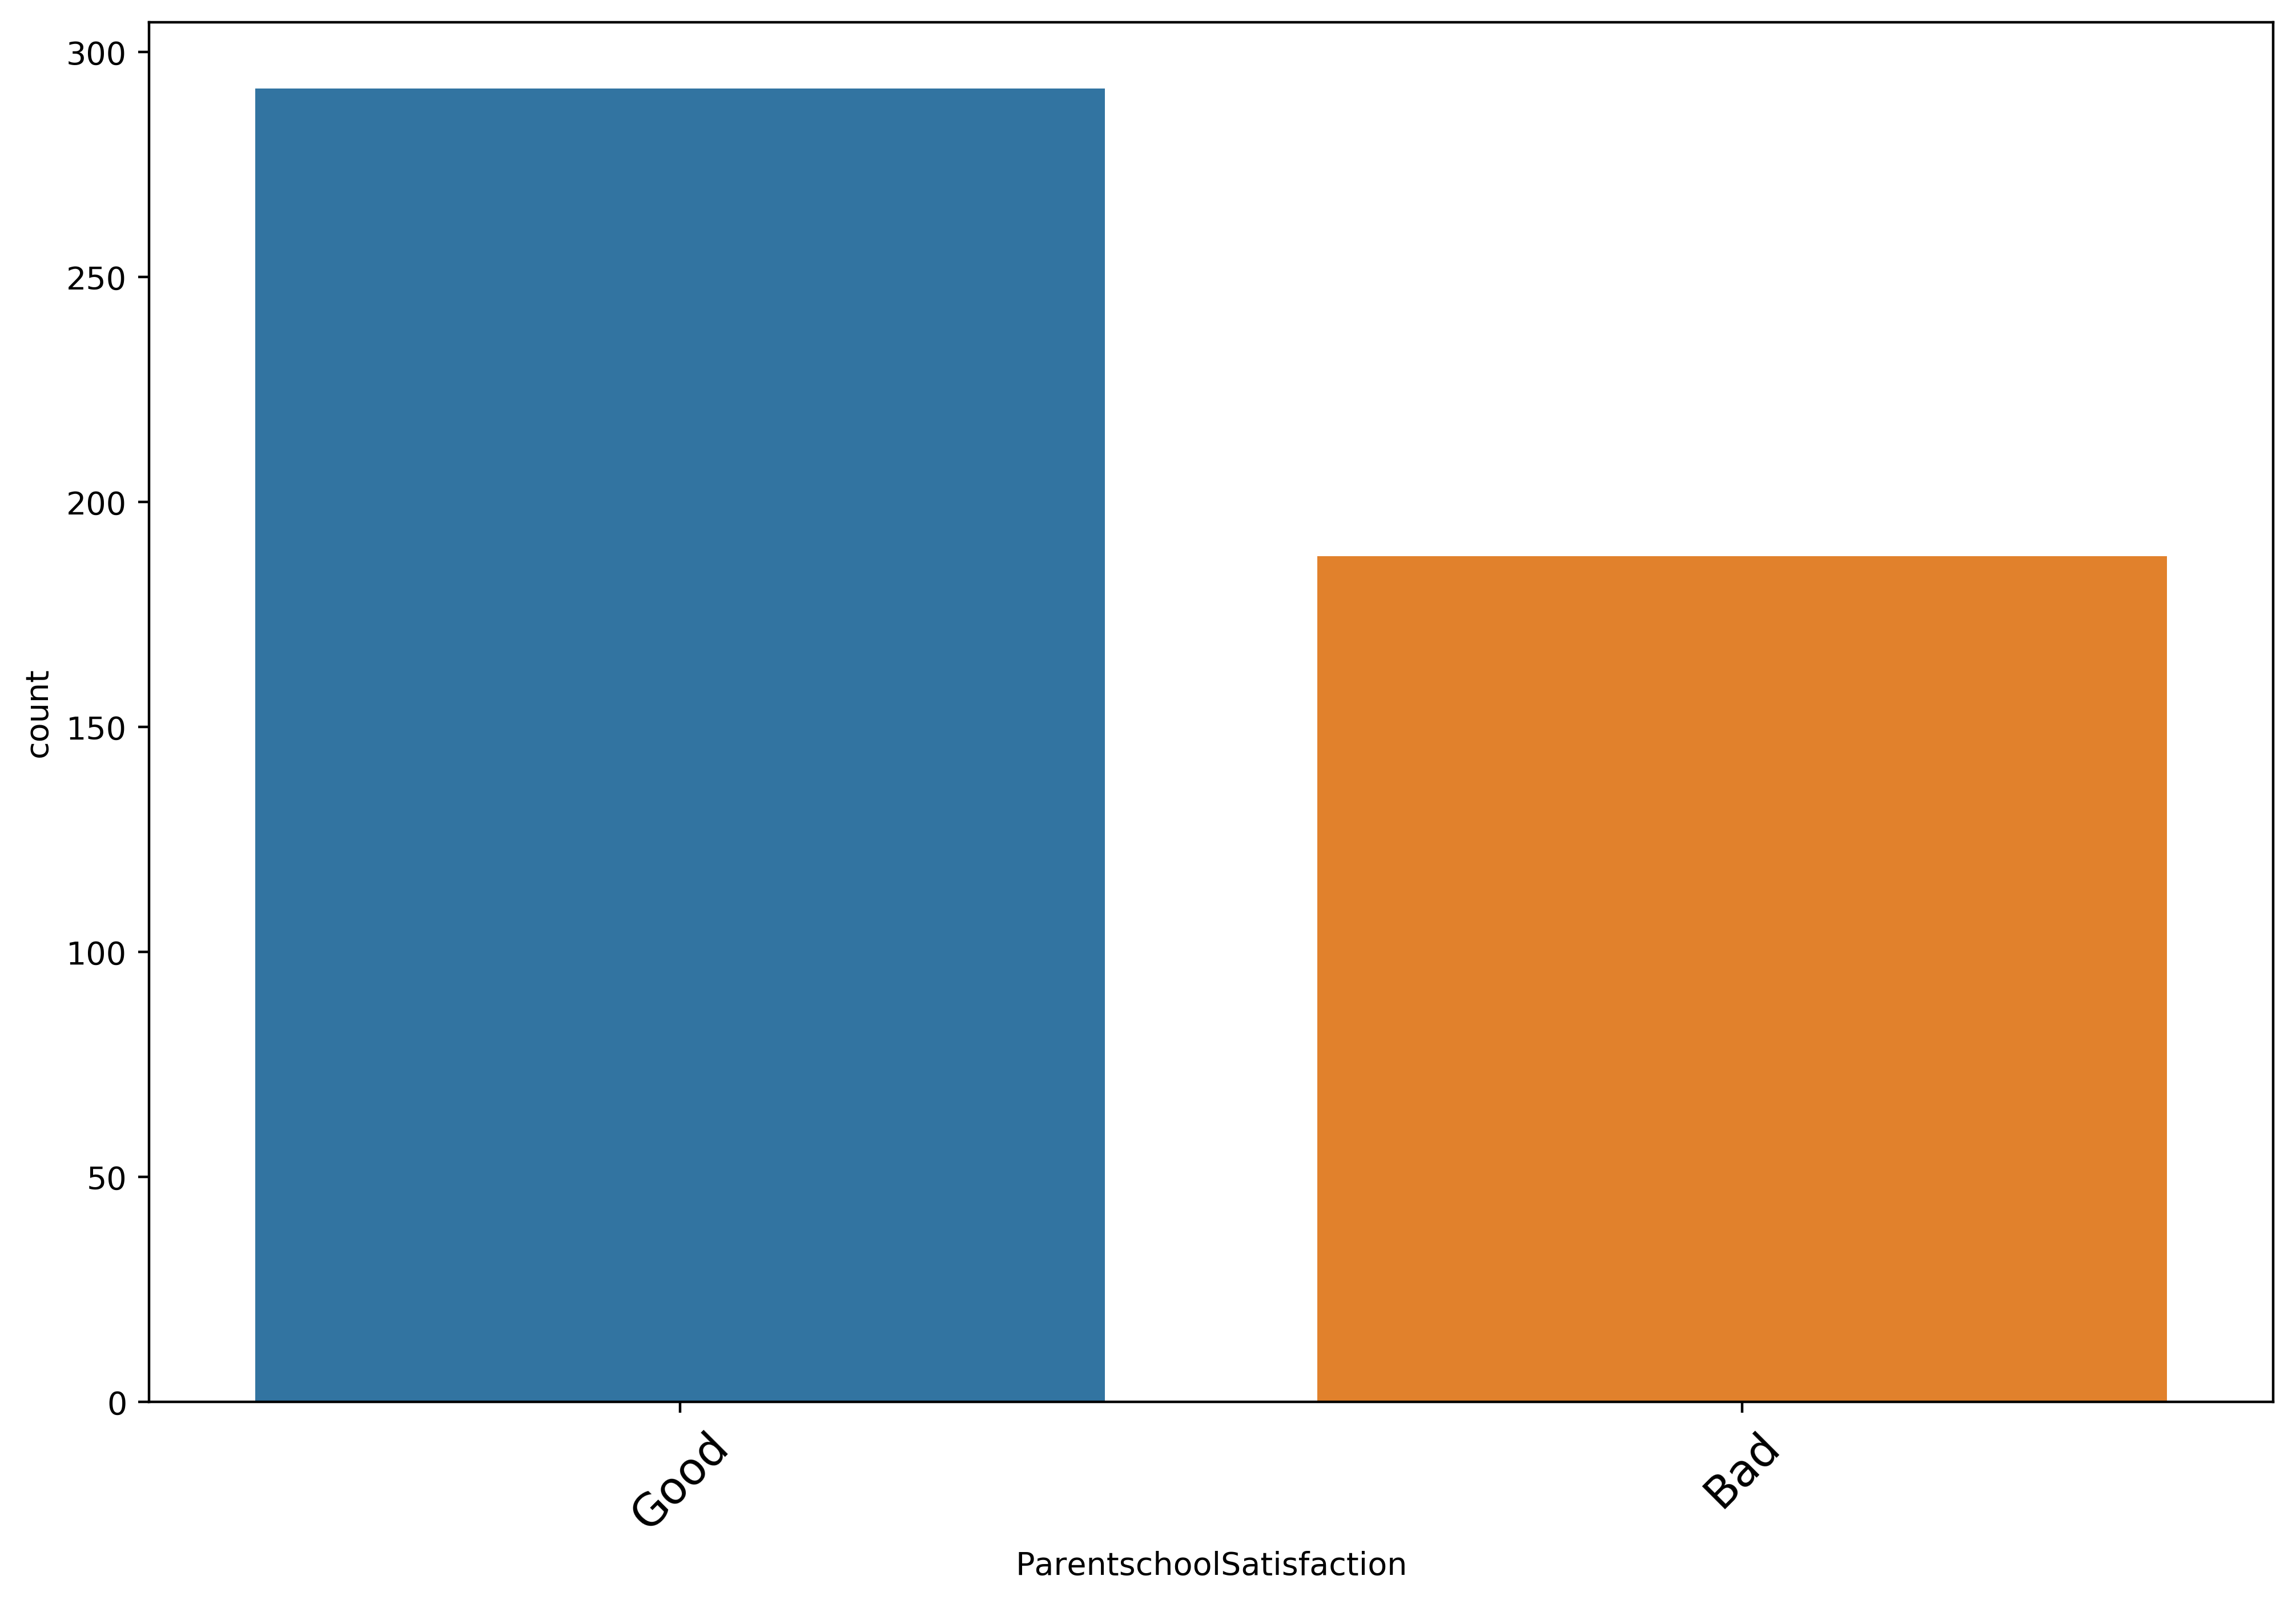

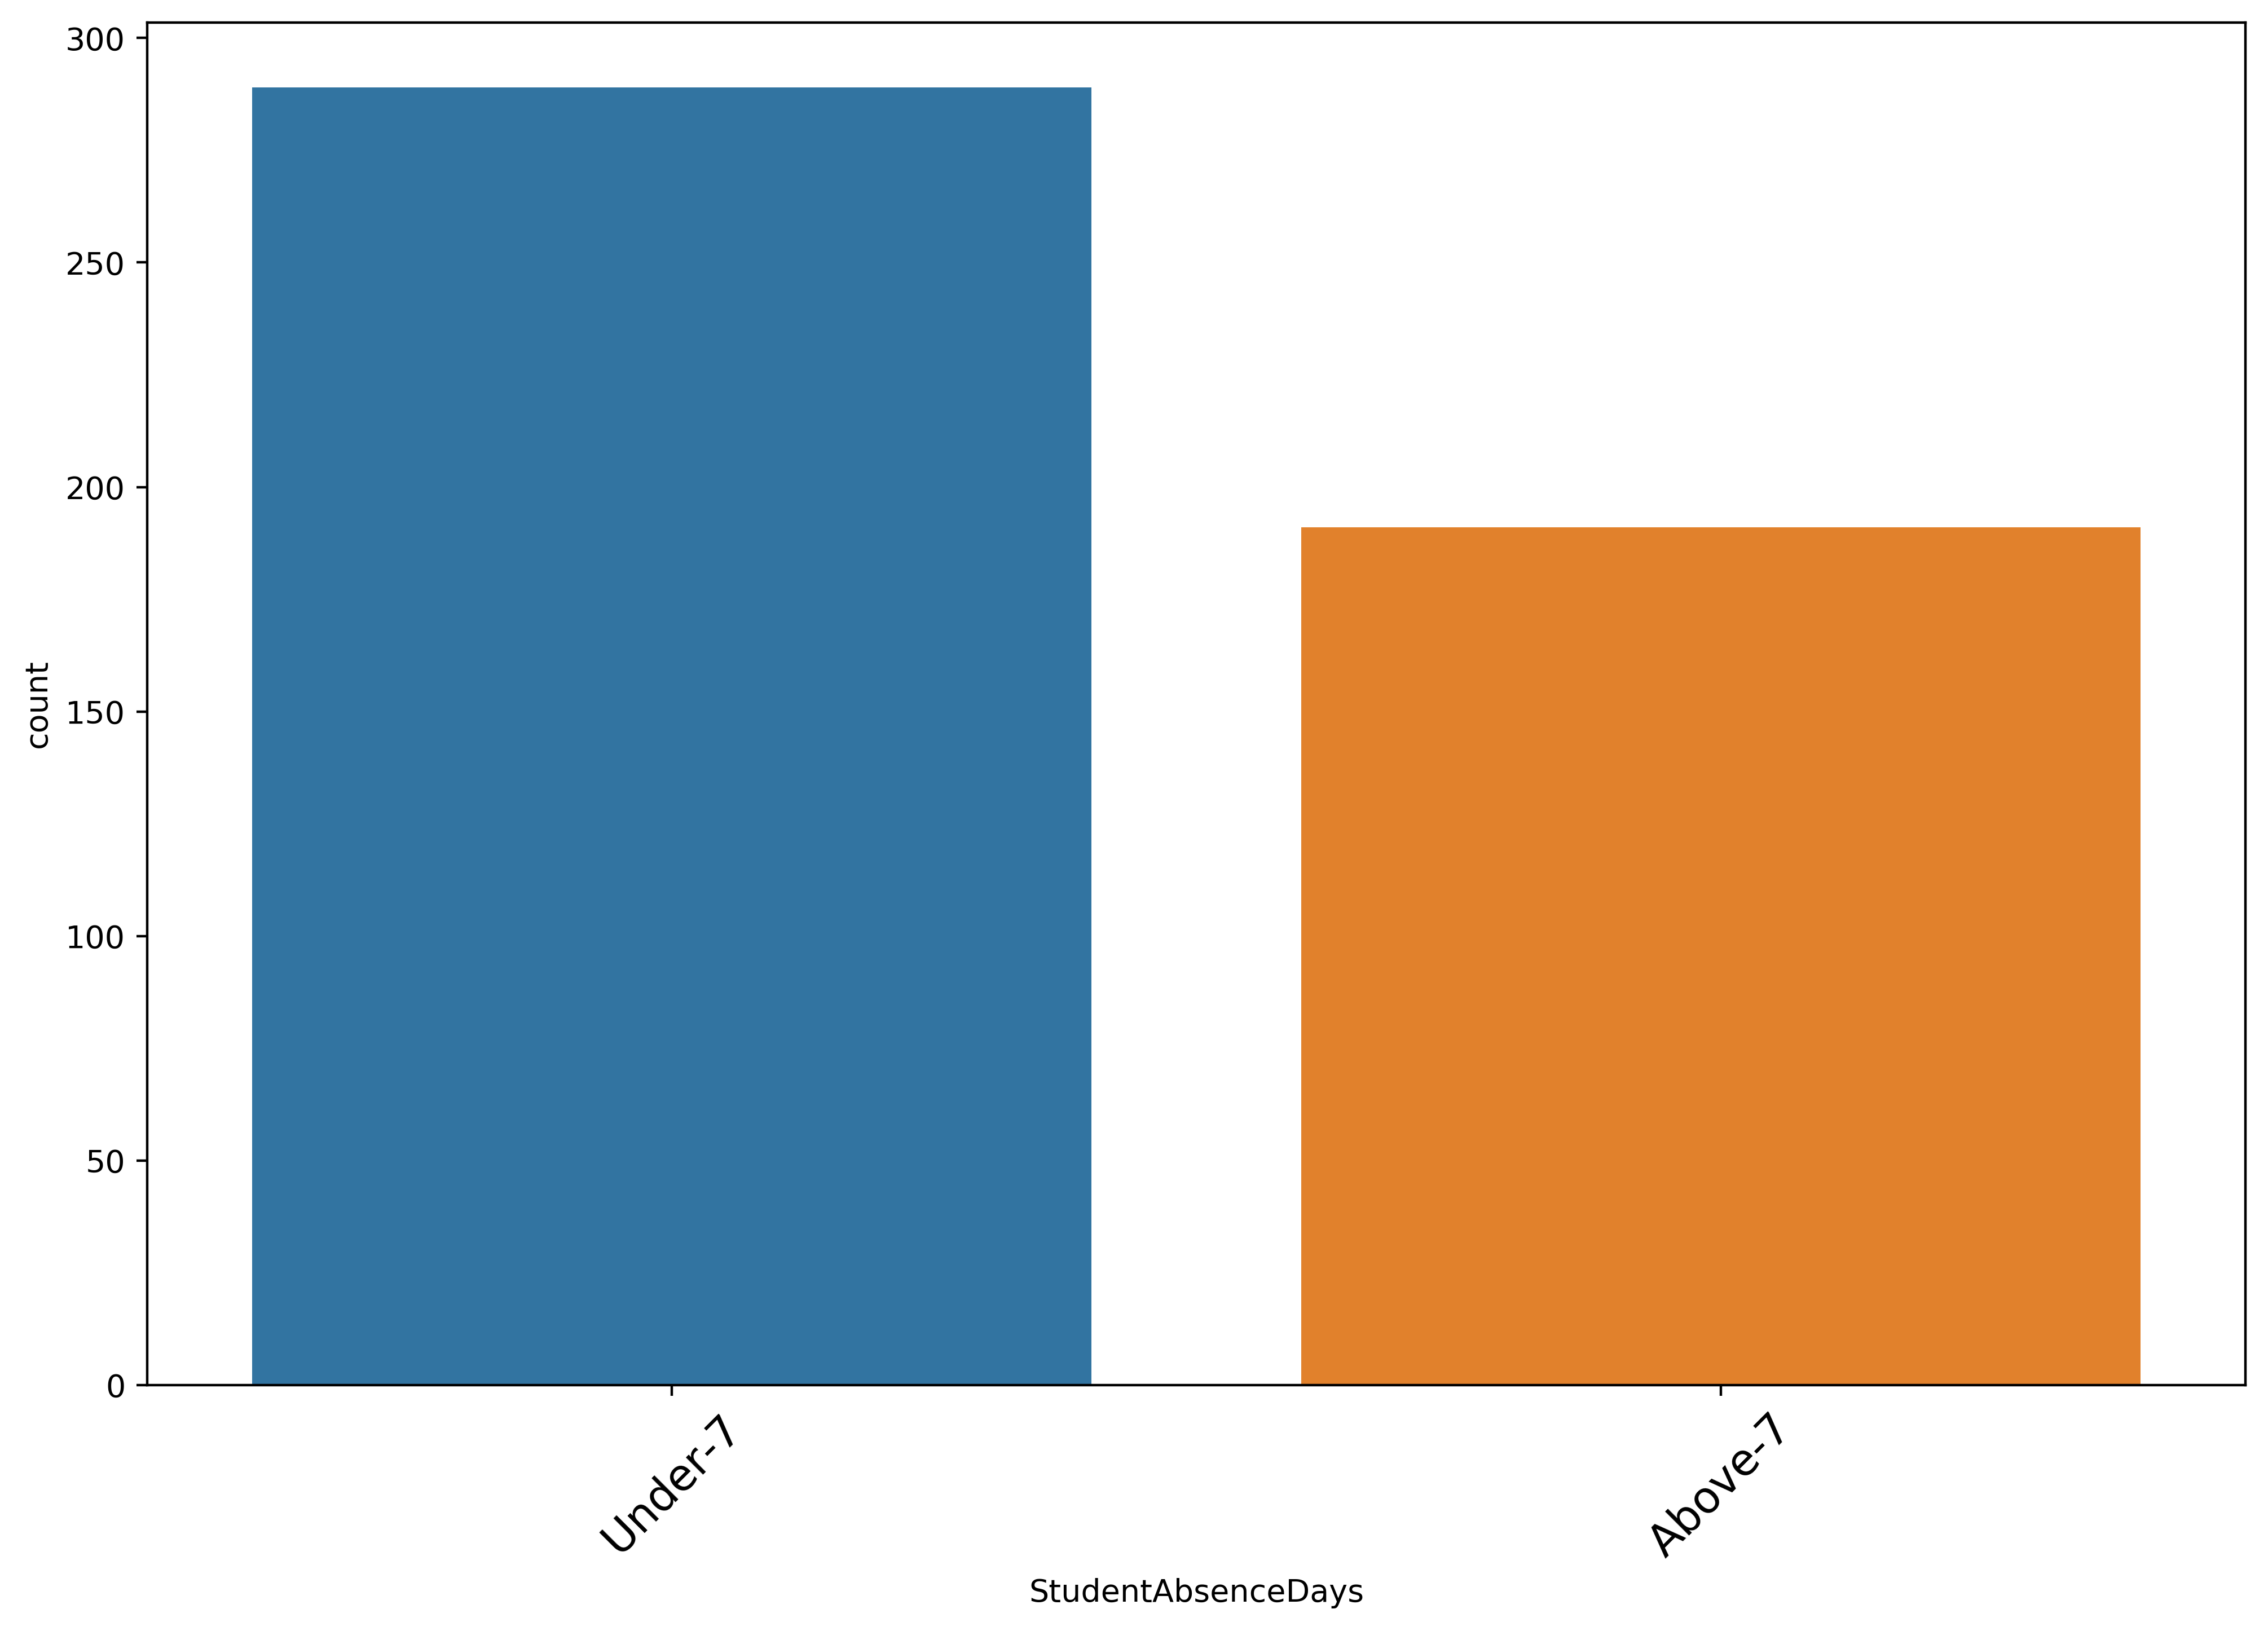

In [10]:
# 了解其他几列数据的分布情况
for column in columns:
    if column in stop or column == "Class":
        pass
    else:
        # 设置画布的分辨率以及画布大小
        plt.figure(dpi=400,figsize=(12,8))
        # 设置x轴横坐标倾斜45度显示以及设置其字体大小
        plt.xticks(rotation=45,fontsize=14)
        sns.countplot(x=column,data=df)
        plt.savefig(path + '/' + "{}柱状分布图.png".format(column))


由上面的图可以看出，学生群体主要来自于KW和Jordan。其中以中小学生为主，而且主要是2/7/8年级的学生，班级是A/B班为主
学IT的学生是最多的

#### 5、了解变量之间的相关性

- 了解课程和成绩的相关性

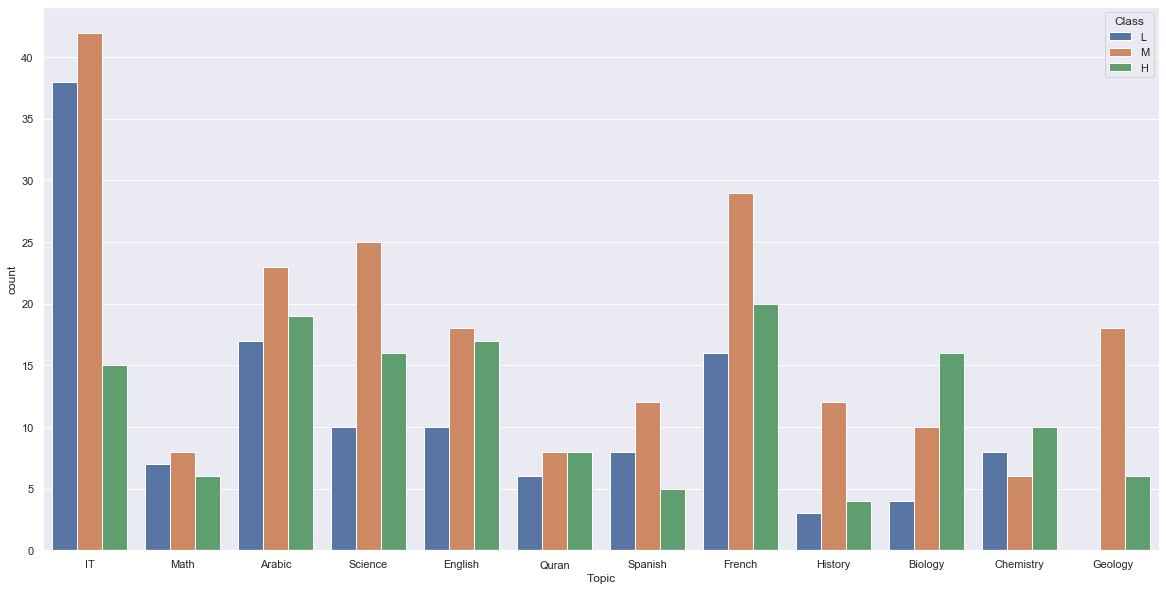

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
fig = sns.countplot(x='Topic',hue='Class',hue_order=['L','M','H'],data=df)
scatter_fig = fig.get_figure()
scatter_fig.savefig(path + '/' + "课程和成绩相关性.png")

从图中可以看出，对于12个学科，有11个学科存在着部分同学处于不及格的状态，只有Geology这门课程学生全部达到中等及以上。对于IT这门课程，虽然学习的人数最多，但是大部分同学获得的成绩在中等以及中等以下，只有少部分的同学成绩达到优秀，说明学生对于这门课程的掌握程度还有待于提升。学习History的人数最少，但是成绩中等的学生最多，成绩优秀和较差的学生相对较少！

- 性别和成绩的相关性分析

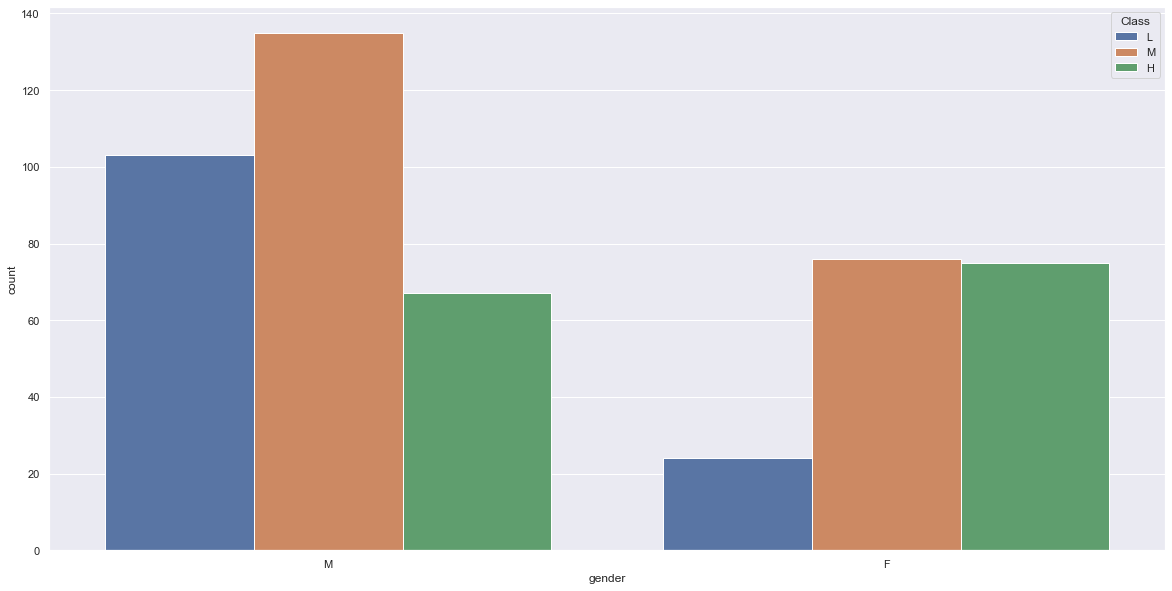

In [12]:
fig = sns.countplot(x='gender',hue='Class',order=['M','F'],hue_order=['L','M','H'],data=df)
scatter_fig = fig.get_figure()
scatter_fig.savefig(path + '/' + "性别和成绩相关性.png")

从图中可以看出，男性中等成绩的人数最多，其次是不及格的人数，成绩优秀的占比最少！女性整体成绩更好一点，大部分都是中等以及优秀，只有少部分学生成绩较差!

- 性别和学科的相关性

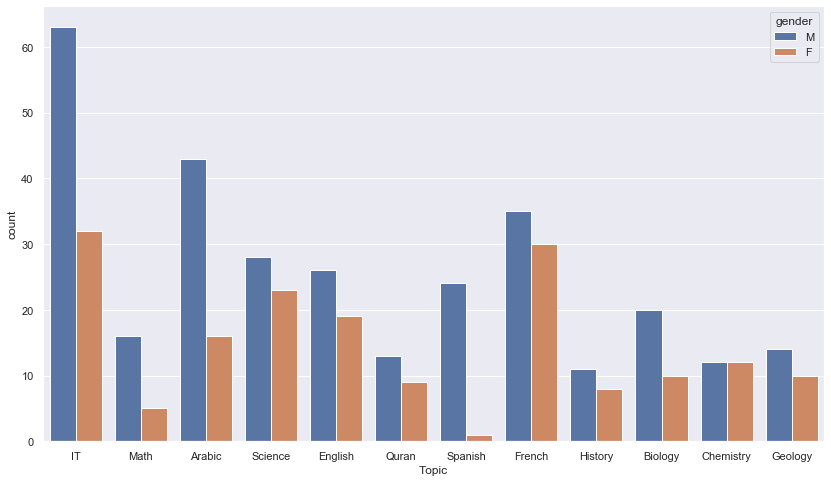

In [13]:
sns.set(rc={'figure.figsize':(14,8)})
fig = sns.countplot(x='Topic',hue='gender',hue_order=['M','F'],data=df)
scatter_fig = fig.get_figure()
scatter_fig.savefig(path + '/' + "性别和学科相关性.png")

由图可知，IT、Math、Arabic、Spanish以及Biology这些学科男生的人数显著比女生多很多，主要是这些学科大部分是偏理科，男生对其更有兴趣，女生的兴趣较低。

- 班级和成绩相关性

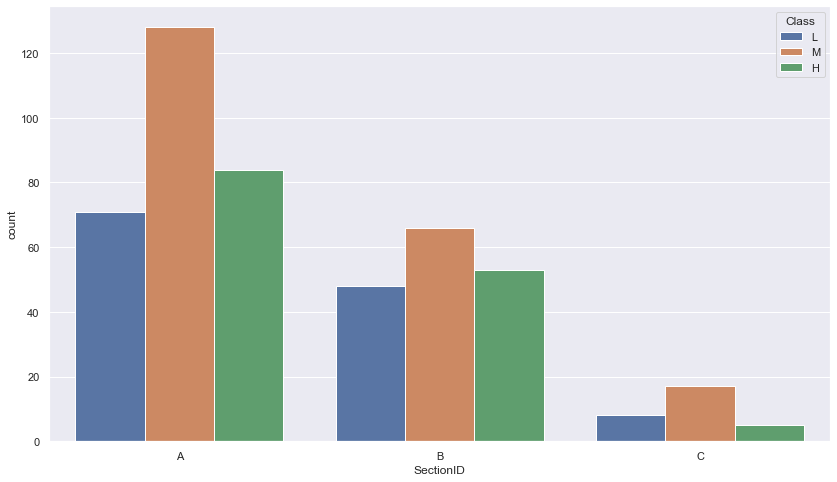

In [14]:
fig = sns.countplot(x='SectionID',hue='Class',hue_order=['L','M','H'],data=df)
scatter_fig = fig.get_figure()
scatter_fig.savefig(path + '/' + "班级和成绩相关性.png")

- 数值型变量的相关性分析

In [15]:
corr = df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']].corr()
corr

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


Discussion与其他三个相关性较低，其他三个变量的相关性都比较高!从热力图看：

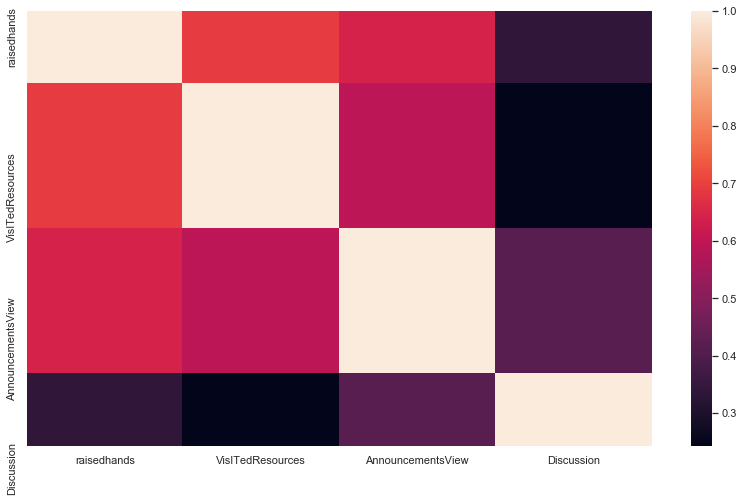

In [16]:
fig = sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
scatter_fig = fig.get_figure()
scatter_fig.savefig(path + '/' + "数值变量热力图.png")

#### 6、其他信息

- 计算每个课程下男生和女生的数量

In [17]:
data_temp = df[['Topic','gender']]
data_temp['count'] = 1
data_temp = data_temp.groupby(['Topic','gender']).agg('sum').reset_index()
data_temp.all

d:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method DataFrame.all of         Topic gender  count
0      Arabic      F     16
1      Arabic      M     43
2     Biology      F     10
3     Biology      M     20
4   Chemistry      F     12
5   Chemistry      M     12
6     English      F     19
7     English      M     26
8      French      F     30
9      French      M     35
10    Geology      F     10
11    Geology      M     14
12    History      F      8
13    History      M     11
14         IT      F     32
15         IT      M     63
16       Math      F      5
17       Math      M     16
18      Quran      F      9
19      Quran      M     13
20    Science      F     23
21    Science      M     28
22    Spanish      F      1
23    Spanish      M     24>

- 计算每个课程下的总人数

In [18]:
data_temp2 = data_temp
data_temp2 = data_temp2.groupby('Topic').agg(sum).reset_index()
data_temp2.all

<bound method DataFrame.all of         Topic  count
0      Arabic     59
1     Biology     30
2   Chemistry     24
3     English     45
4      French     65
5     Geology     24
6     History     19
7          IT     95
8        Math     21
9       Quran     22
10    Science     51
11    Spanish     25>

- 将每个课程的总人数以及男女分别多少人都放到同一个数据集data_temp里面

In [19]:
data_temp = pd.merge(data_temp,data_temp2,on=('Topic'),how='left')
data_temp.all

<bound method DataFrame.all of         Topic gender  count_x  count_y
0      Arabic      F       16       59
1      Arabic      M       43       59
2     Biology      F       10       30
3     Biology      M       20       30
4   Chemistry      F       12       24
5   Chemistry      M       12       24
6     English      F       19       45
7     English      M       26       45
8      French      F       30       65
9      French      M       35       65
10    Geology      F       10       24
11    Geology      M       14       24
12    History      F        8       19
13    History      M       11       19
14         IT      F       32       95
15         IT      M       63       95
16       Math      F        5       21
17       Math      M       16       21
18      Quran      F        9       22
19      Quran      M       13       22
20    Science      F       23       51
21    Science      M       28       51
22    Spanish      F        1       25
23    Spanish      M       24    

- 计算每个学科中男女比例分别是多少

In [20]:
data_temp['proportion']=data_temp['count_x']/data_temp['count_y']
data_temp.all

<bound method DataFrame.all of         Topic gender  count_x  count_y  proportion
0      Arabic      F       16       59    0.271186
1      Arabic      M       43       59    0.728814
2     Biology      F       10       30    0.333333
3     Biology      M       20       30    0.666667
4   Chemistry      F       12       24    0.500000
5   Chemistry      M       12       24    0.500000
6     English      F       19       45    0.422222
7     English      M       26       45    0.577778
8      French      F       30       65    0.461538
9      French      M       35       65    0.538462
10    Geology      F       10       24    0.416667
11    Geology      M       14       24    0.583333
12    History      F        8       19    0.421053
13    History      M       11       19    0.578947
14         IT      F       32       95    0.336842
15         IT      M       63       95    0.663158
16       Math      F        5       21    0.238095
17       Math      M       16       21    0.761905


### 三、学生成绩预测

使用逻辑回归模型进行预测，并计算准确率！Logistic 回归的本质是：假设数据服从这个分布，然后使用极大似然估计做参数的估计。

In [21]:
# 导入相关模块包
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [22]:
# 建立特征工程和目标变量(注意：numpy的版本必须小于1.20，否则会报错)
X = df.drop('Class',axis=1)
y = df['Class']
# 把所有的非数值型变量转化为数值型
X = pd.get_dummies(X)
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [23]:
# 选择训练集和测试集，划分比例是8:2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [24]:
# 进行模型的训练
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
# 进行预测以及求准确率
predict_y = lr.predict(X_test)
print('predict',predict_y)
score = accuracy_score(y_test,predict_y)
score

predict ['H' 'M' 'M' 'L' 'H' 'H' 'H' 'H' 'M' 'L' 'M' 'L' 'H' 'M' 'M' 'M' 'L' 'H'
 'M' 'H' 'L' 'M' 'M' 'H' 'M' 'L' 'H' 'M' 'M' 'H' 'H' 'H' 'L' 'M' 'H' 'L'
 'M' 'M' 'L' 'H' 'M' 'L' 'H' 'L' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'L' 'M' 'M'
 'M' 'H' 'H' 'L' 'M' 'H' 'H' 'L' 'H' 'M' 'M' 'M' 'M' 'H' 'L' 'H' 'M' 'L'
 'M' 'H' 'M' 'M' 'M' 'L' 'H' 'H' 'L' 'H' 'L' 'L' 'M' 'H' 'L' 'H' 'H' 'M'
 'M' 'L' 'M' 'M' 'H' 'M']


0.7395833333333334

可以看出准确率在0.74左右

### 四、模型优化

从可视化图表探索发现SectionID与Class关系不大，所以尝试：
去掉变量SectionID(班级)之后再做Class与其他变量之间的Logistic回归

In [26]:
X = df.drop('Class',axis=1)
X = X.drop('SectionID',axis=1)
y = df['Class']
X = pd.get_dummies(X)
X.head(10)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,42,30,13,70,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
6,35,12,0,17,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7,50,10,15,22,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
8,12,21,16,50,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
9,70,80,25,70,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
#训练模型并检验准确率
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict_y = lr.predict(X_test)
print('predict',predict_y)
score = accuracy_score(y_test,predict_y)
score

predict ['H' 'M' 'M' 'L' 'M' 'H' 'H' 'H' 'M' 'L' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'H'
 'M' 'H' 'L' 'M' 'M' 'M' 'M' 'L' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'M' 'H' 'L'
 'M' 'M' 'L' 'H' 'M' 'L' 'H' 'L' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'L' 'M' 'M'
 'M' 'H' 'H' 'L' 'M' 'H' 'H' 'L' 'H' 'M' 'M' 'M' 'M' 'H' 'L' 'H' 'M' 'L'
 'M' 'M' 'M' 'H' 'M' 'L' 'H' 'H' 'L' 'H' 'L' 'L' 'M' 'H' 'M' 'H' 'H' 'M'
 'M' 'L' 'M' 'M' 'H' 'M']


0.8020833333333334

可以看到去掉变量SectionID之后的回归结果比之前的准确率要高，用来预测学生成绩单更加可靠